This supplementary information presents :

- first, the code to generate the figures from the paper,
- second, some control experiments that were mentionned in the paper,
- finally, some perspectives for future work inspired by the algorithms presented in the paper.

# Figures for "An adaptive algorithm for unsupervised learning"



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
seed = 42
np.random.seed(seed)

In [3]:
# some overhead for the formatting of figures
import matplotlib.pyplot as plt

fontsize = 12
FORMATS = ['.pdf', '.eps', '.png', '.tiff']
FORMATS = ['.pdf', '.png']
dpi_export = 600

fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
#fig_width_pt = 1024 #221     # Get this from LaTeX using \showthe\columnwidth / x264 asks for a multiple of 2
ppi = 72.27 # (constant) definition of the ppi = points per inch
inches_per_pt = 1.0/ppi  # Convert pt to inches
#inches_per_cm = 1./2.54
fig_width = fig_width_pt*inches_per_pt  # width in inches
grid_fig_width = 2*fig_width
phi = (np.sqrt(5) + 1. ) /2
#legend.fontsize = 8
#fig_width = 9
fig_height = fig_width/phi
figsize = (fig_width, fig_height)


def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

import matplotlib
pylab_defaults = { 
    'font.size': 10,
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'text.usetex': False,
#    'font.family' : 'sans-serif',
#    'font.sans-serif' : ['Helvetica'],
    }
    
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update(pylab_defaults)
#matplotlib.rcParams.update({'text.usetex': True})

import matplotlib.cm as cm


from IPython.display import Image

DEBUG = True
DEBUG = False
hl, hs = 10*'-', 10*' '

In [56]:
tag = 'ICLR'

In [5]:
from shl_scripts.shl_experiments import SHL
datapath = '../../SparseHebbianLearning/database'
shl = SHL(datapath=datapath)
data = shl.get_data(matname=tag)

In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  7.751930312581928e-19  +/-  0.009577051865437938
average energy of data =  0.2985162259034731 +/- 0.08935954499531111


In [7]:
18**2

324

In [8]:
!ls -l {shl.cache_dir}/{tag}*
#!rm {shl.cache_dir}/{tag}*lock*
#!rm {shl.cache_dir}/{tag}*
#!ls -l {shl.cache_dir}/{tag}*

-rw-r--r--  1 laurentperrinet  staff    3097433 Sep 27 06:39 cache_dir/ICLR - algorithm=lars_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3097433 Sep 27 06:32 cache_dir/ICLR - algorithm=lasso_cd_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3097433 Sep 27 06:22 cache_dir/ICLR - algorithm=lasso_lars_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3097433 Sep 27 06:43 cache_dir/ICLR - algorithm=mp_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3097433 Sep 27 06:39 cache_dir/ICLR - algorithm=omp_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3097488 Sep 27 06:18 cache_dir/ICLR_EMP_alpha_homeo=0.01732_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3097488 Sep 27 06:18 cache_dir/ICLR_EMP_alpha_homeo=0.02539_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3097488 Sep 27 06:18 cache_dir/ICLR_EMP_alpha_homeo=0.03723_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3097488 Sep 27 06:18 cache_dir/ICLR_EMP_alpha_homeo=0.05457_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3097488

## figure 1:  Role of homeostasis in learning sparse representations

#### TODO : cross-validate with 10 different learnings

In [9]:
fname = 'figure_map'
N_cv = 10
one_cv = 0 # picking one to display intermediate results
opts = dict(eta=0.0033, eta_homeo=0.05, alpha_homeo=.5, cache_dir='cache_dir_1100') 
opts = dict(eta=0.0033, eta_homeo=0.005, alpha_homeo=2.5, cache_dir='cache_dir')

### learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

----------          Non          ----------
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -1.6405697274831362e-05 +/- 0.0011089082352882336
average energy of filters =  1.0 +/- 4.485978453382214e-17


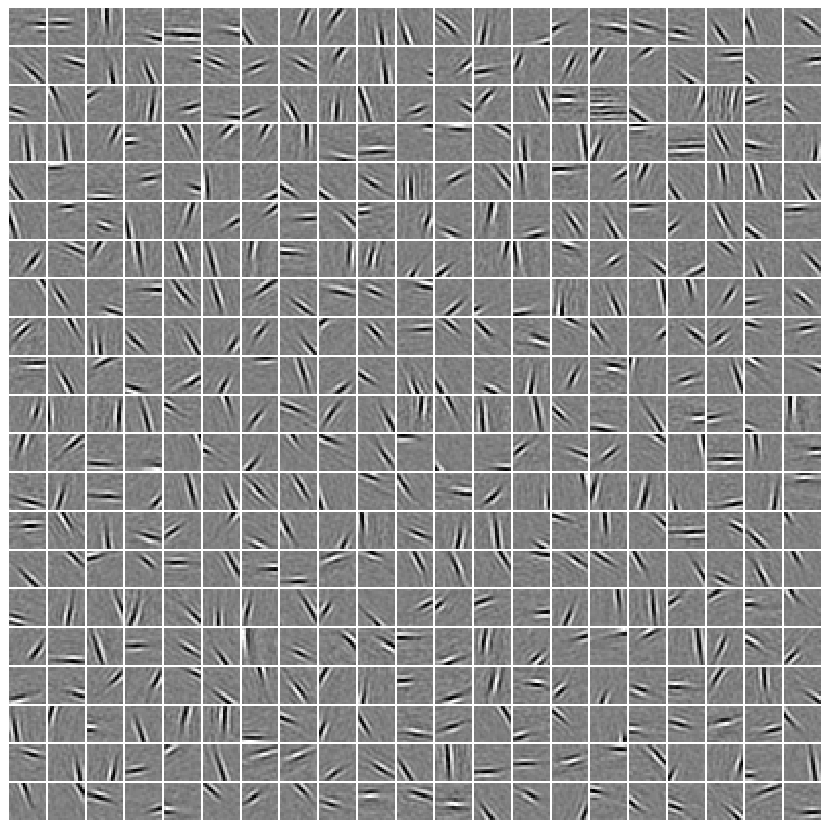

----------          OLS          ----------
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -3.857505082947717e-05 +/- 0.0010690061691283569
average energy of filters =  1.0 +/- 4.5478569413264154e-17


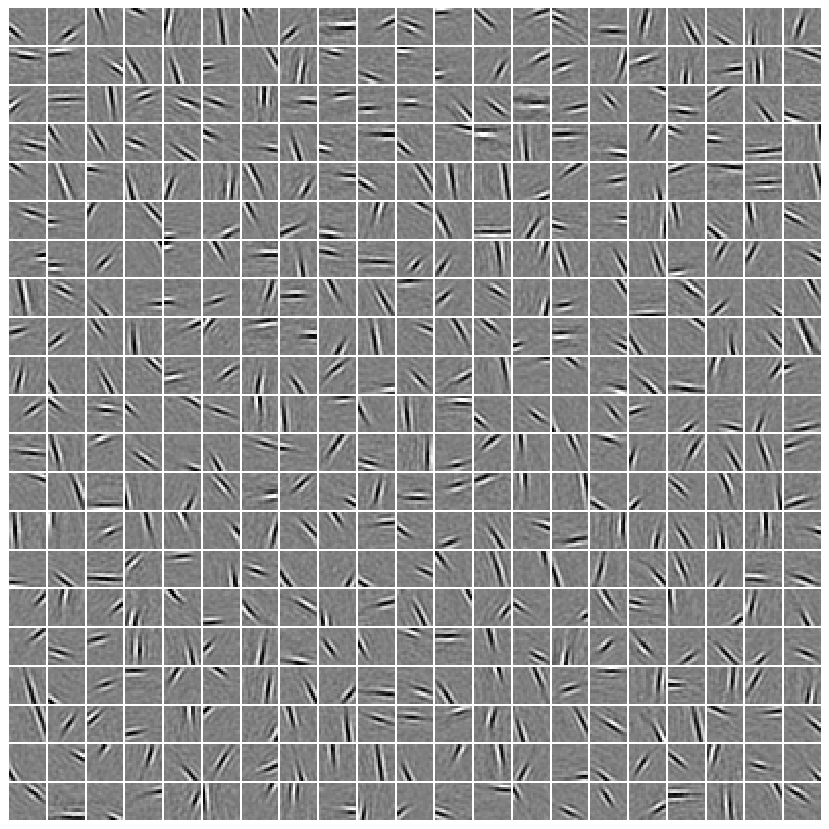

----------          HEH          ----------
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -3.671032041283512e-05 +/- 0.0010713307323955397
average energy of filters =  1.0 +/- 3.5856661466053436e-17


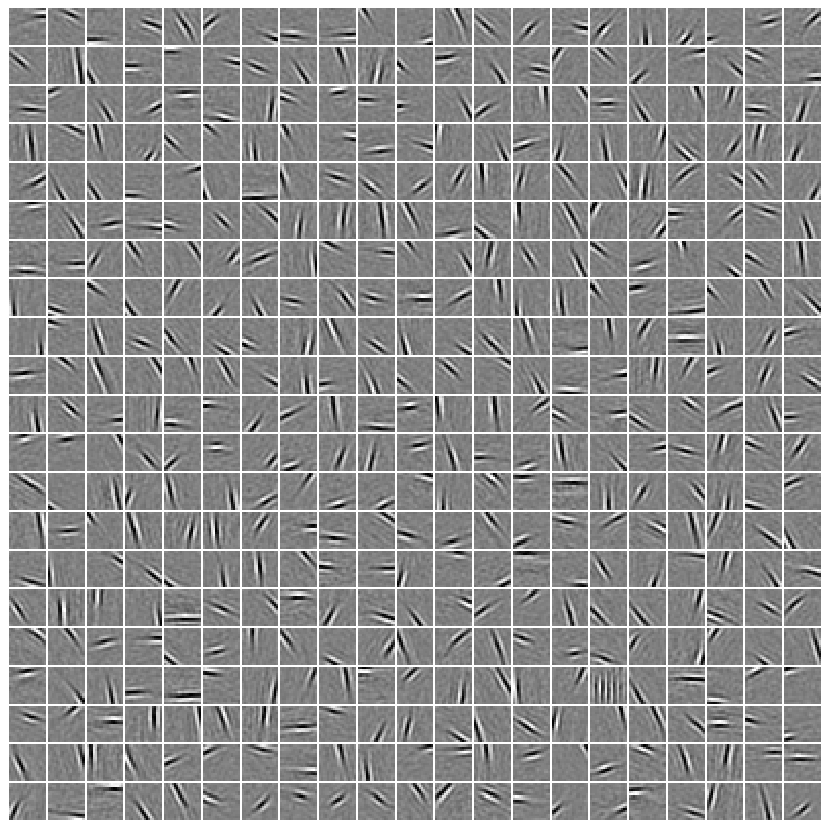

In [10]:
homeo_methods = ['None', 'OLS', 'HEH']

list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']
list_figures = []
dico = {}
for i_cv in range(N_cv):
    dico[i_cv] = {}
    for homeo_method in homeo_methods:
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv, **opts)
        dico[i_cv][homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+i_cv))

list_figures = ['show_dico']
for i_cv in [one_cv]:
    for homeo_method in homeo_methods:
        print(hl + hs + homeo_method[:3] + hs + hl)
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv, **opts)
        shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+i_cv))

        print('size of dictionary = (number of filters, size of imagelets) = ', dico[i_cv][homeo_method].dictionary.shape)
        print('average of filters = ',  dico[i_cv][homeo_method].dictionary.mean(axis=1).mean(), 
              '+/-',  dico[i_cv][homeo_method].dictionary.mean(axis=1).std())
        SE = np.sqrt(np.sum(dico[i_cv][homeo_method].dictionary**2, axis=1))
        print('average energy of filters = ', SE.mean(), '+/-', SE.std())
        plt.show()


### panel A: plotting some dictionaries



In [11]:
pname = '/tmp/panel_A' #pname = fname + '_A'

In [12]:
from shl_scripts import show_dico
if DEBUG: show_dico(shl, dico[one_cvi_cv][homeo_method], dim_graph=(2,5))

In [13]:
dim_graph = (2, 9)
colors = ['black', 'orange', 'blue']
homeo_methods

['None', 'OLS', 'HEH']

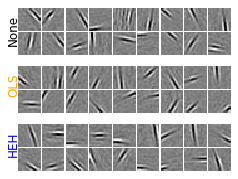

In [14]:
subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig, axs = plt.subplots(3, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, color, homeo_method in zip(axs.ravel(), colors, homeo_methods): 
    ax.axis(c=color, lw=2, axisbg='w')
    ax.set_facecolor('w')
    fig, ax = show_dico(shl, dico[one_cv][homeo_method], dim_graph=dim_graph, seed=18, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'

for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)

In [15]:
if DEBUG: Image(pname +'.png')

In [16]:
if DEBUG: help(fig.subplots_adjust)

In [17]:
if DEBUG: help(plt.subplots)

In [18]:
if DEBUG: help(matplotlib.gridspec.GridSpec)

### panel B: quantitative comparison



In [19]:
pname = '/tmp/panel_B' #fname + '_B'

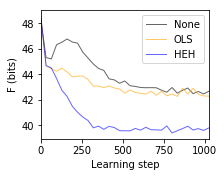

In [20]:
from shl_scripts import time_plot
variable = 'F'
alpha = .3
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
for i_cv in range(N_cv):
    for color, homeo_method in zip(colors, homeo_methods): 
        ax.axis(c='b', lw=2, axisbg='w')
        ax.set_facecolor('w')
        if i_cv==0:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, label=homeo_method, alpha=.6, fig=fig, ax=ax)
        else:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, alpha=alpha, fig=fig, ax=ax)        
        # ax.set_ylabel(homeo_method)
        #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'
ax.legend(loc='best')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [83]:
import tikzmagic

In [84]:
%load_ext tikzmagic

In [85]:
#DEBUG = True
if DEBUG: help(tikzmagic)

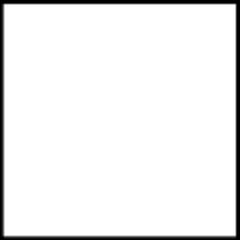

In [86]:
%tikz \draw (0,0) rectangle (1,1);

In [24]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

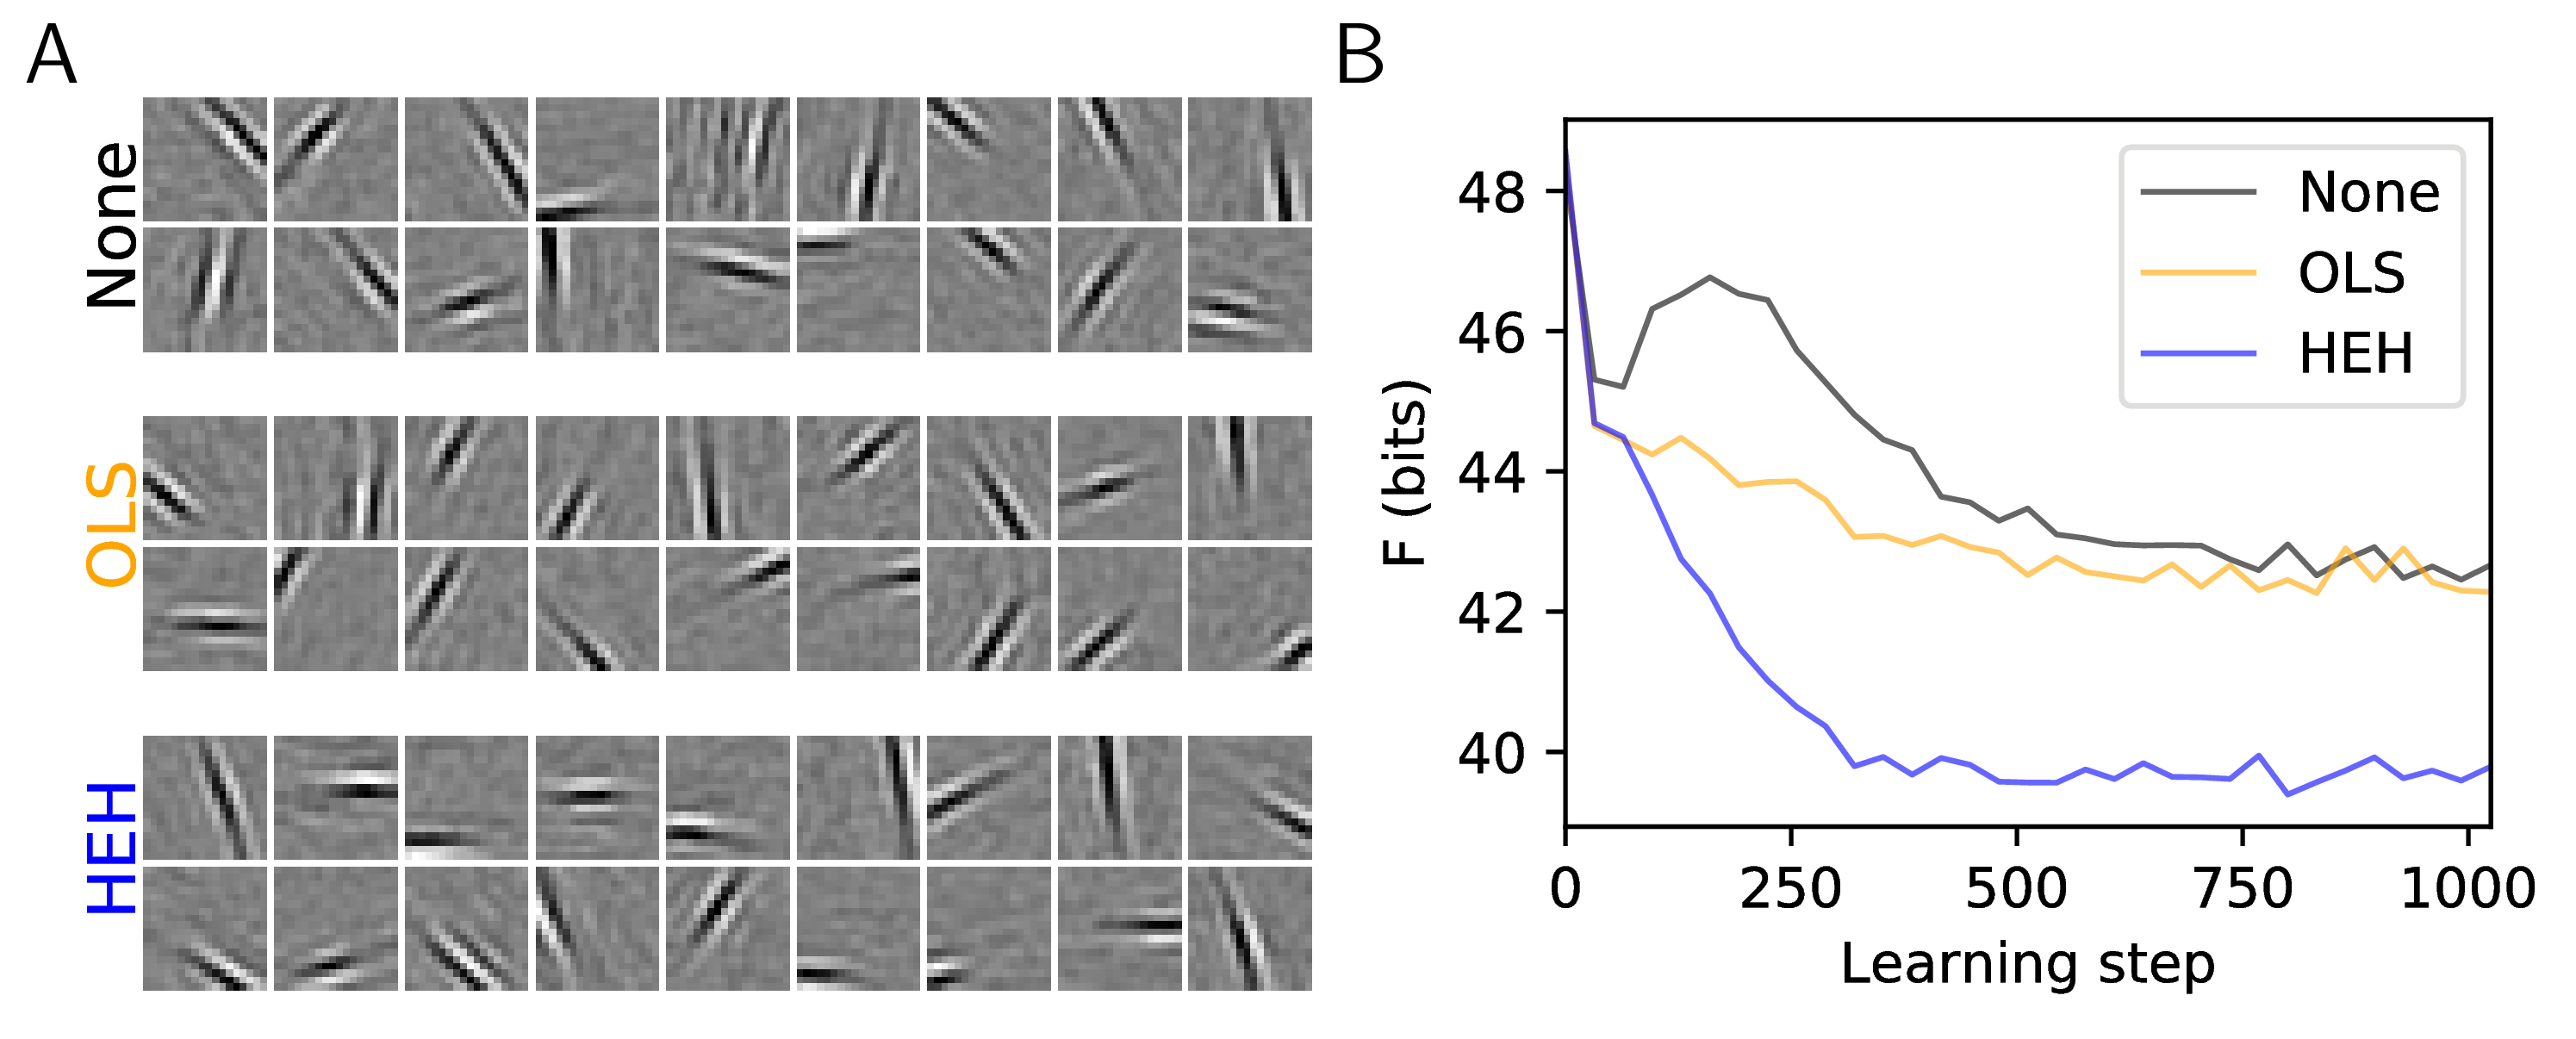

In [25]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## figure 2: Histogram Equalization Homeostasis



In [26]:
fname = 'figure_HEH'

First collecting data:

----------          None          ----------


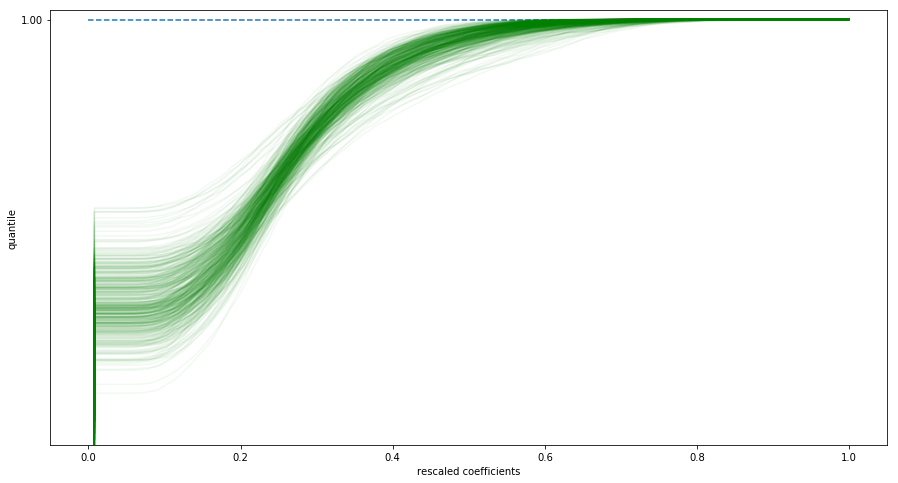

----------          OLS          ----------


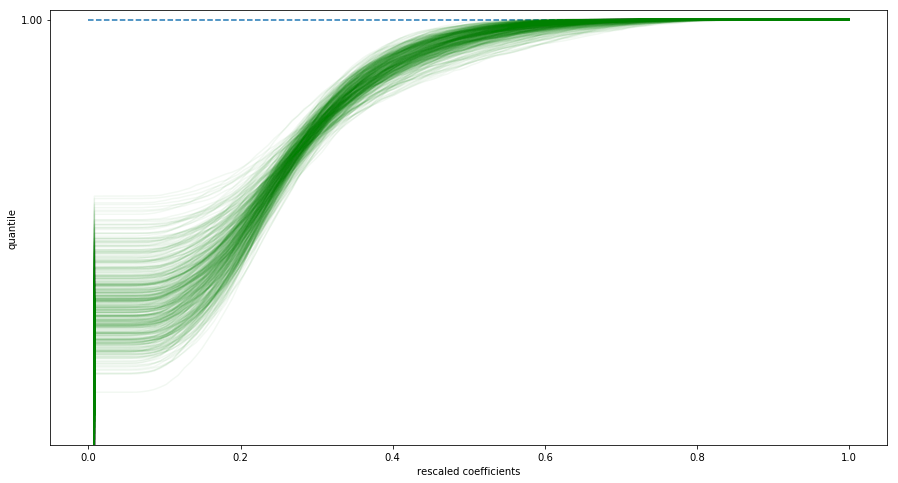

----------          HEH          ----------


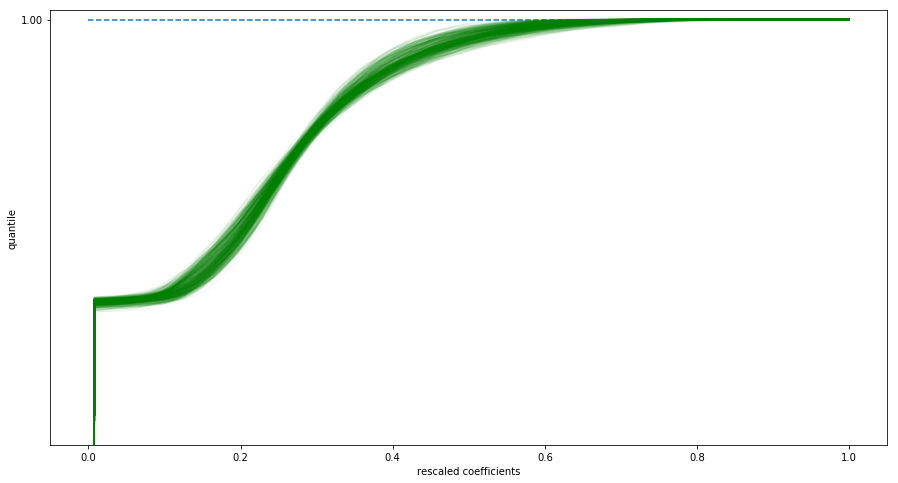

In [27]:
list_figures = ['show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(hl + hs + homeo_method + hs + hl)
    shl = SHL(homeo_method=homeo_method, **opts)
    #dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_' + str(one_cv))
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+one_cv))
    plt.show()

In [28]:
dico[homeo_method].P_cum.shape

(441, 128)

### panel A: different P_cum



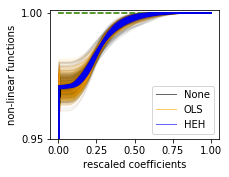

In [29]:
pname = '/tmp/panel_A' #pname = fname + '_A'

from shl_scripts import plot_P_cum
variable = 'F'
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
for color, homeo_method in zip(colors, homeo_methods): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    fig, ax = plot_P_cum(dico[homeo_method].P_cum, ymin=0.95, ymax=1.001, 
                         title=None, suptitle=None, ylabel='non-linear functions', 
                         verbose=False, n_yticks=21, alpha=.05, c=color, fig=fig, ax=ax)
    ax.plot([0], [0], lw=1, color=color, label=homeo_method, alpha=.6)
    # ax.set_ylabel(homeo_method)
    #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'
ax.legend(loc='lower right')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')

In [30]:
if DEBUG: help(fig.legend)

### panel B: comparing the effects of parameters



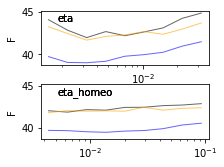

In [31]:
pname = '/tmp/panel_B' #fname + '_B'


from shl_scripts.shl_experiments import SHL_set

homeo_methods = ['None', 'EMP', 'HAP', 'HEH', 'OLS']

homeo_methods = ['None', 'OLS', 'HEH']

variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness', 'n_dictionary']
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']
variables = ['alpha_homeo', 'eta_homeo']
variables = ['eta', 'alpha_homeo', 'eta_homeo']
variables = ['eta', 'eta_homeo']




list_figures = []

for homeo_method in homeo_methods:
    experiments = SHL_set(dict(homeo_method=homeo_method, datapath=datapath), tag=tag + '_' + homeo_method)
    experiments.run(variables=variables, n_jobs=1, verbose=0)
    

import matplotlib.pyplot as plt
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95, wspace=0.5, hspace=0.35,)

if len(variables)==4:
    fig, axs = plt.subplots(2, 2, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars, sharey=True)
    for i_ax, variable in enumerate(variables):
        for color, homeo_method in zip(colors, homeo_methods): 
            experiments = SHL_set(dict(homeo_method=homeo_method, datapath=datapath), tag=tag + '_' + homeo_method)
            ax = axs[i_ax%2][i_ax//2]
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=ax, color=color, display_variable='F', verbose=0) #, label=homeo_metho
            ax.set_xlabel('') #variable
            ax.text(.1, .8,  variable, transform=axs[i_ax].transAxes) 
            #axs[i_ax].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

else:    
    fig, axs = plt.subplots(len(variables), 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars, sharey=True)

    for i_ax, variable in enumerate(variables):
        for color, homeo_method in zip(colors, homeo_methods): 
            experiments = SHL_set(dict(homeo_method=homeo_method, datapath=datapath), tag=tag + '_' + homeo_method)
            fig, axs[i_ax] = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=axs[i_ax], color=color, display_variable='F', verbose=0) #, label=homeo_metho
            axs[i_ax].set_xlabel('') #variable
            axs[i_ax].text(.1, .8,  variable, transform=axs[i_ax].transAxes) 
            #axs[i_ax].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#fig.legend(loc='lower right')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [32]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A.pdf}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B.pdf}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

In [33]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
if DEBUG: Image(fname +'.png')

## figure 3:  


### learning




In [34]:
fname = 'figure_HAP'

----------          OLS          ----------


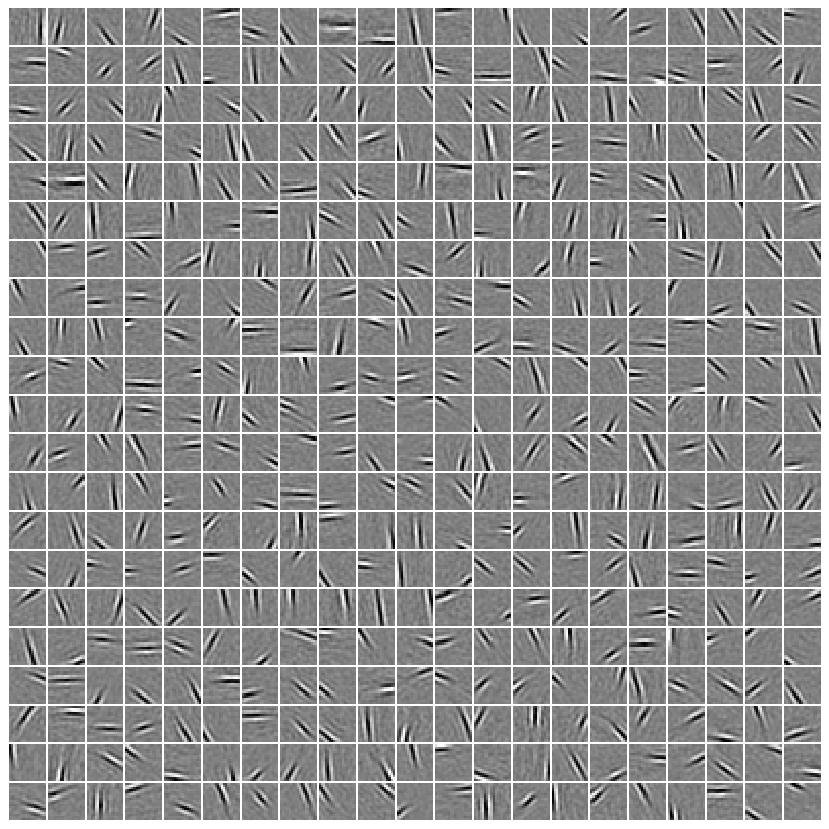

size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -3.857505082947717e-05 +/- 0.0010690061691283569
average energy of filters =  1.0 +/- 4.5478569413264154e-17
----------          EMP          ----------


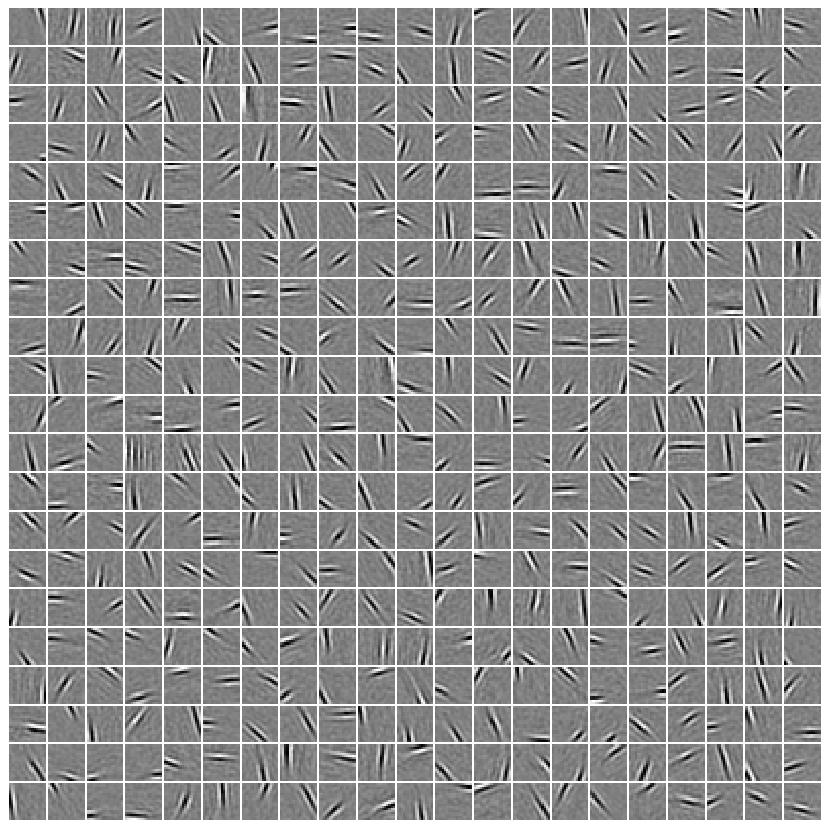

size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -2.593727157972236e-05 +/- 0.001153444209141448
average energy of filters =  1.0 +/- 3.215820483078219e-17
----------          HAP          ----------


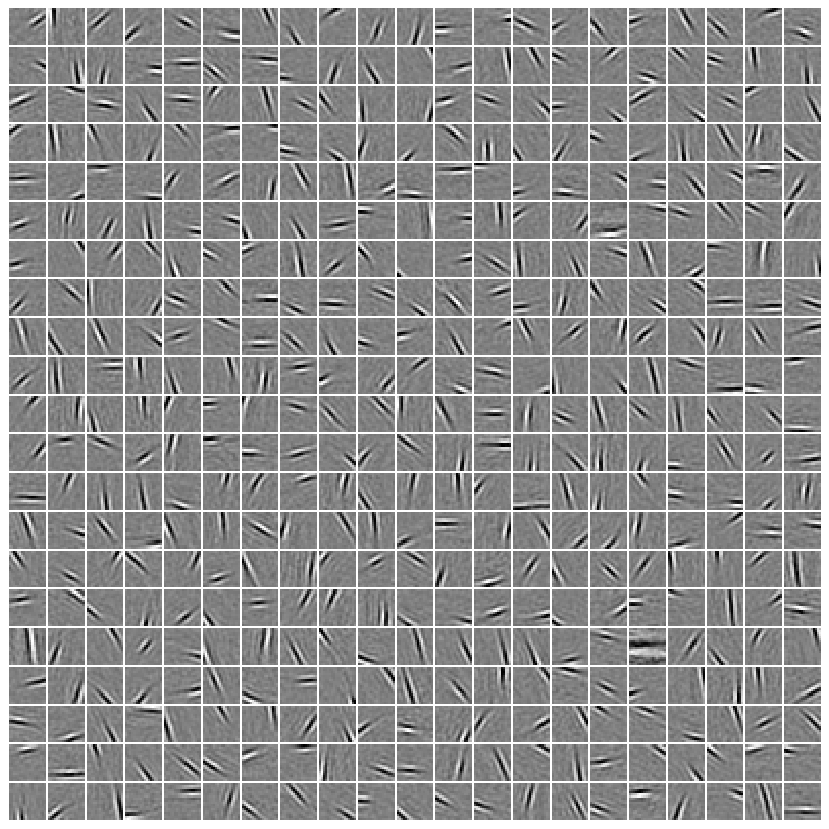

size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  1.1429453024713143e-05 +/- 0.0011302512760692812
average energy of filters =  1.0 +/- 4.4232344059125003e-17
----------          HEH          ----------


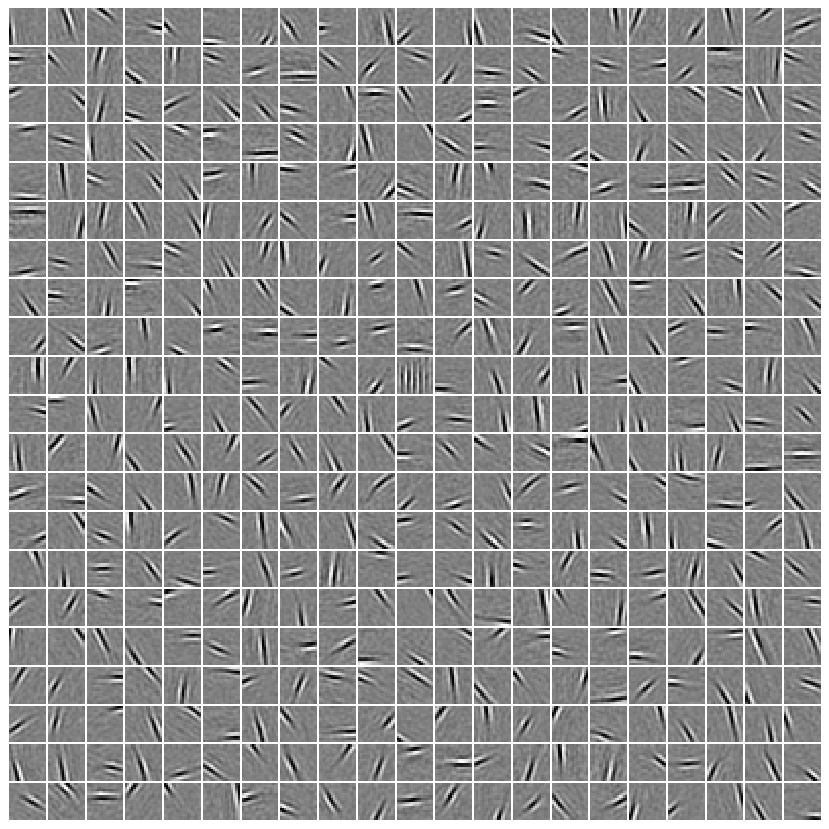

size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -3.671032041283512e-05 +/- 0.0010713307323955397
average energy of filters =  1.0 +/- 3.5856661466053436e-17


In [35]:
colors = ['orange', 'red', 'green', 'blue']
homeo_methods = ['OLS', 'EMP', 'HAP', 'HEH']
list_figures = []
dico = {}
for i_cv in range(N_cv):
    dico[i_cv] = {}
    for homeo_method in homeo_methods:
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv)
        dico[i_cv][homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+i_cv))

list_figures = ['show_dico']
for i_cv in [one_cv]:
    for homeo_method in homeo_methods:
        print(hl + hs + homeo_method + hs + hl)
        shl = SHL(homeo_method=homeo_method, seed=seed+i_cv)
        shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method + '_seed=' + str(seed+i_cv))
        plt.show()
        print('size of dictionary = (number of filters, size of imagelets) = ', dico[i_cv][homeo_method].dictionary.shape)
        print('average of filters = ',  dico[i_cv][homeo_method].dictionary.mean(axis=1).mean(), 
              '+/-',  dico[i_cv][homeo_method].dictionary.mean(axis=1).std())
        SE = np.sqrt(np.sum(dico[i_cv][homeo_method].dictionary**2, axis=1))
        print('average energy of filters = ', SE.mean(), '+/-', SE.std())

### panel A: plotting some dictionaries



In [36]:
pname = '/tmp/panel_A' #pname = fname + '_A'

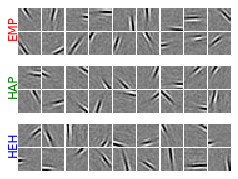

In [37]:

subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig, axs = plt.subplots(3, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, color, homeo_method in zip(axs.ravel(), colors[1:], homeo_methods[1:]): 
    ax.axis(c=color, lw=2, axisbg='w')
    ax.set_facecolor('w')
    from shl_scripts import show_dico
    fig, ax = show_dico(shl, dico[one_cv][homeo_method], dim_graph=dim_graph, seed=1973, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'

for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)

### panel B: quantitative comparison



In [38]:
pname = '/tmp/panel_B' #fname + '_B'

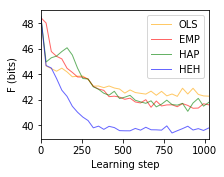

In [39]:
from shl_scripts import time_plot
variable = 'F'
alpha = .3
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
for i_cv in range(N_cv):
    for color, homeo_method in zip(colors, homeo_methods): 
        ax.axis(c='b', lw=2, axisbg='w')
        ax.set_facecolor('w')
        if i_cv==0:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, label=homeo_method, alpha=.6, fig=fig, ax=ax)
        else:
            fig, ax = time_plot(shl, dico[i_cv][homeo_method], variable=variable, unit='bits', color=color, alpha=alpha, fig=fig, ax=ax)        
ax.legend(loc='best')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
if DEBUG: Image(pname +'.png')    

In [40]:
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [41]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

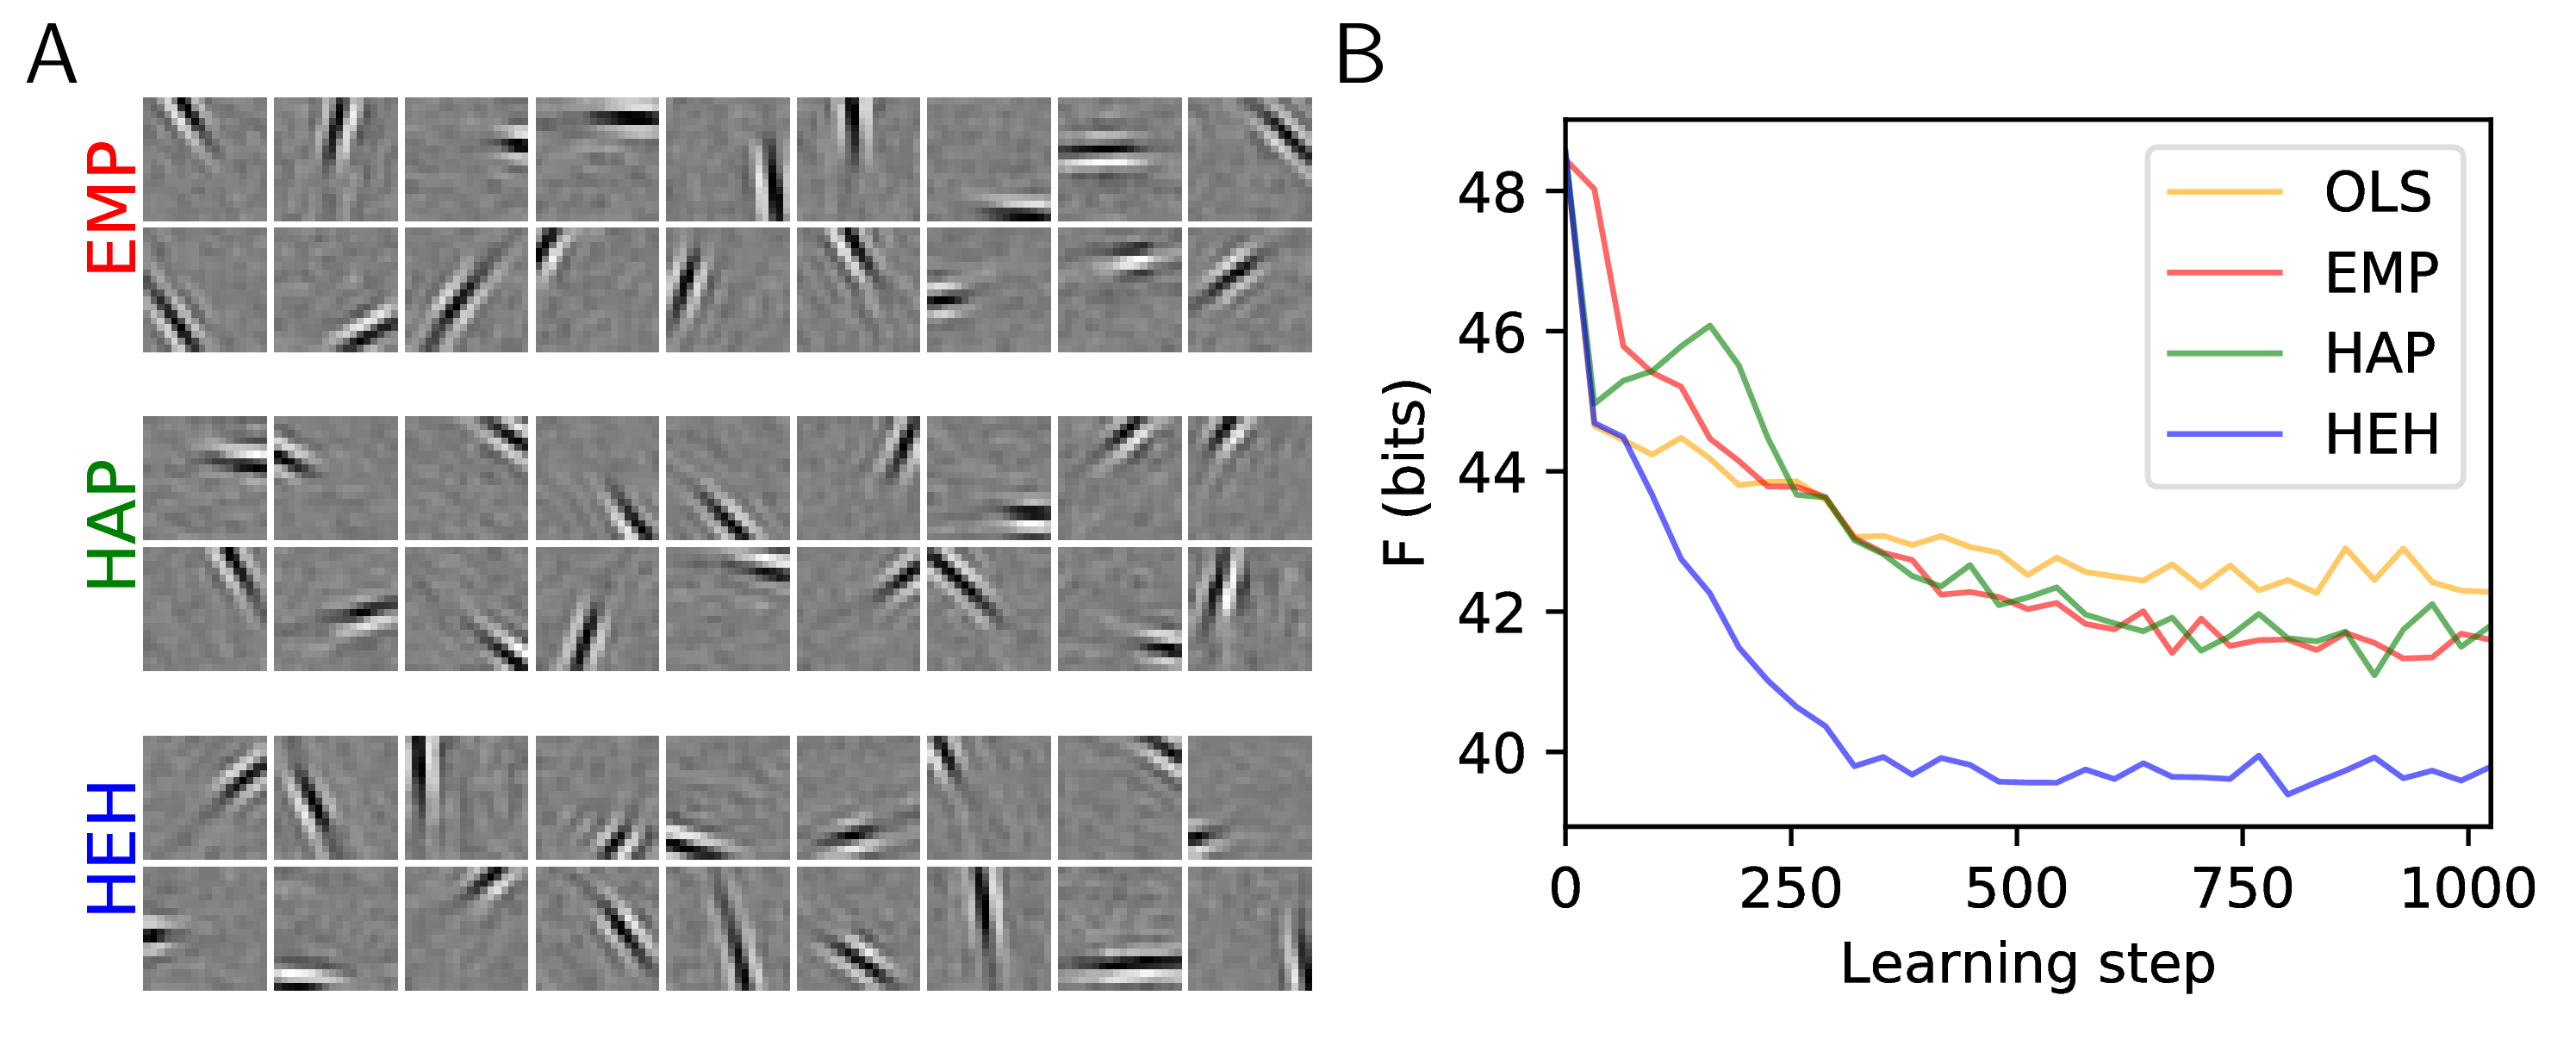

In [42]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## figure 4: Convolutional Neural Network  




In [78]:
fname = 'figure_CNN'

In [29]:
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere

import os
datapath = os.path.join("/tmp", "database")
path = os.path.join(datapath, "Face_DataBase")
TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))

# MP Parameters
nb_dico = 20
width = 9
dico_size = (width, width)
l0 = 20
seed = 42
# Learning Parameters
eta = .05
nb_epoch = 500

TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))
N_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
Filtered_L_TrSet = FilterInputData(
    N_TrSet, sigma=0.25, style='Custom', start_R=15)

mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')

from CHAMP.CHAMP_Layer import CHAMP_Layer

from CHAMP.DataTools import SaveNetwork, LoadNetwork
homeo_methods = ['None', 'HAP']

for homeo_method, eta_homeo  in zip(homeo_methods, [0., 0.0025]):
    fname = 'cache_dir/CHAMP_low_' + homeo_method + '.pkl'
    try:
        L1_mask = LoadNetwork(loading_path=fname)
    except:
        L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                          dico_size=dico_size, mask=mask, verbose=1)
        dico_mask = L1_mask.TrainLayer(
            Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)
        SaveNetwork(Network=L1_mask, saving_path=fname)


### panel A: plotting some dictionaries



In [69]:
pname = '/tmp/panel_A' #pname = fname + '_A'

<Figure size 720x216 with 0 Axes>

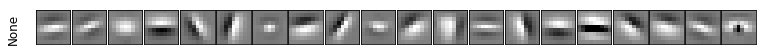

<Figure size 720x216 with 0 Axes>

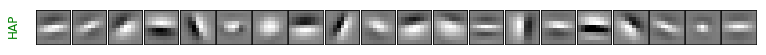

In [70]:
subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)

for color, homeo_method in zip(['black', 'green'], homeo_methods): 
    #fig, axs = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
    fname = 'cache_dir/CHAMP_low_' + homeo_method + '.pkl'
    L1_mask = LoadNetwork(loading_path=fname)
    fig, ax = DisplayDico(L1_mask.dictionary)
    # ax.set_ylabel(homeo_method)
    #for ax in list(axs):
    #    ax.axis(c=color, lw=2, axisbg='w')
    #    ax.set_facecolor('w')
    ax[0].text(-8, 3, homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'
    
    for ext in FORMATS: fig.savefig(pname + '_' + homeo_method + ext, dpi=dpi_export)


### panel B: quantitative comparison



In [88]:
pname = '/tmp/panel_B' #fname + '_B'

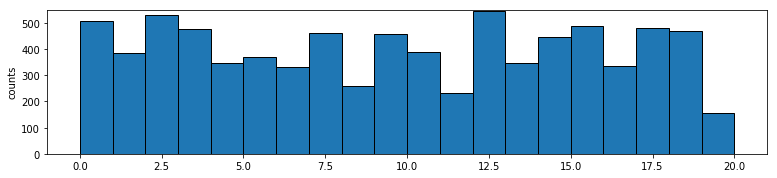

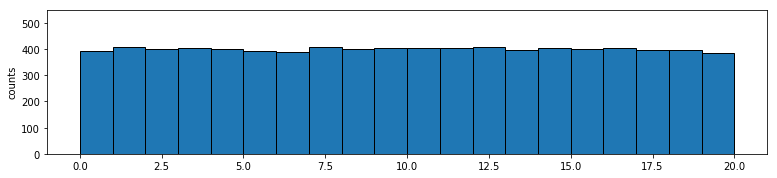

In [91]:
from shl_scripts import time_plot
variable = 'F'
alpha = .3
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)

for color, homeo_method in zip(['black', 'green'], homeo_methods): 
    #fig, axs = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
    fname = 'cache_dir/CHAMP_low_' + homeo_method + '.pkl'
    L1_mask = LoadNetwork(loading_path=fname)
    fig, ax = DisplayConvergenceCHAMP(L1_mask, to_display=['histo'])#1, color=color)
    ax.axis(c=color, lw=2, axisbg='w')
    ax.set_facecolor('w')
    ax.set_ylabel('counts')
    ax.set_ylim(0, 550)
    #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'
    #ax[0].text(-8, 3, homeo_method, fontsize=12, color=color, rotation=90)#, backgroundcolor='white'
    
    for ext in FORMATS: fig.savefig(pname + '_' + homeo_method + ext, dpi=dpi_export)
    if DEBUG: Image(pname +'.png')    


### Montage of the subplots


In [92]:
%ls -ltr /tmp/panel_*

-rw-r--r--  1 laurentperrinet  wheel  71948 Sep 27 14:53 /tmp/panel_A.pdf
-rw-r--r--  1 laurentperrinet  wheel  84268 Sep 27 14:53 /tmp/panel_A.png
-rw-r--r--  1 laurentperrinet  wheel   6974 Sep 27 16:03 /tmp/panel_B.pdf
-rw-r--r--  1 laurentperrinet  wheel  51500 Sep 27 16:03 /tmp/panel_B.png
-rw-r--r--  1 laurentperrinet  wheel  34748 Sep 27 16:19 /tmp/panel_A_None.pdf
-rw-r--r--  1 laurentperrinet  wheel  54116 Sep 27 16:19 /tmp/panel_A_None.png
-rw-r--r--  1 laurentperrinet  wheel  34335 Sep 27 16:19 /tmp/panel_A_HAP.pdf
-rw-r--r--  1 laurentperrinet  wheel  54059 Sep 27 16:19 /tmp/panel_A_HAP.png
-rw-r--r--  1 laurentperrinet  wheel   7995 Sep 27 16:24 /tmp/panel_B_None.pdf
-rw-r--r--  1 laurentperrinet  wheel  32686 Sep 27 16:24 /tmp/panel_B_None.png
-rw-r--r--  1 laurentperrinet  wheel   7981 Sep 27 16:24 /tmp/panel_B_HAP.pdf
-rw-r--r--  1 laurentperrinet  wheel  32258 Sep 27 16:24 /tmp/panel_B_HAP.png


In [93]:
fname

'cache_dir/CHAMP_low_HAP.pkl'

In [94]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=\linewidth]{/tmp/panel_A_None}};
\draw [anchor=north west] (.0\linewidth, .191\linewidth) node {\includegraphics[width=\linewidth]{/tmp/panel_A_HAP}};
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.45\linewidth]{/tmp/panel_B_None}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.45\linewidth]{/tmp/panel_B_HAP}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

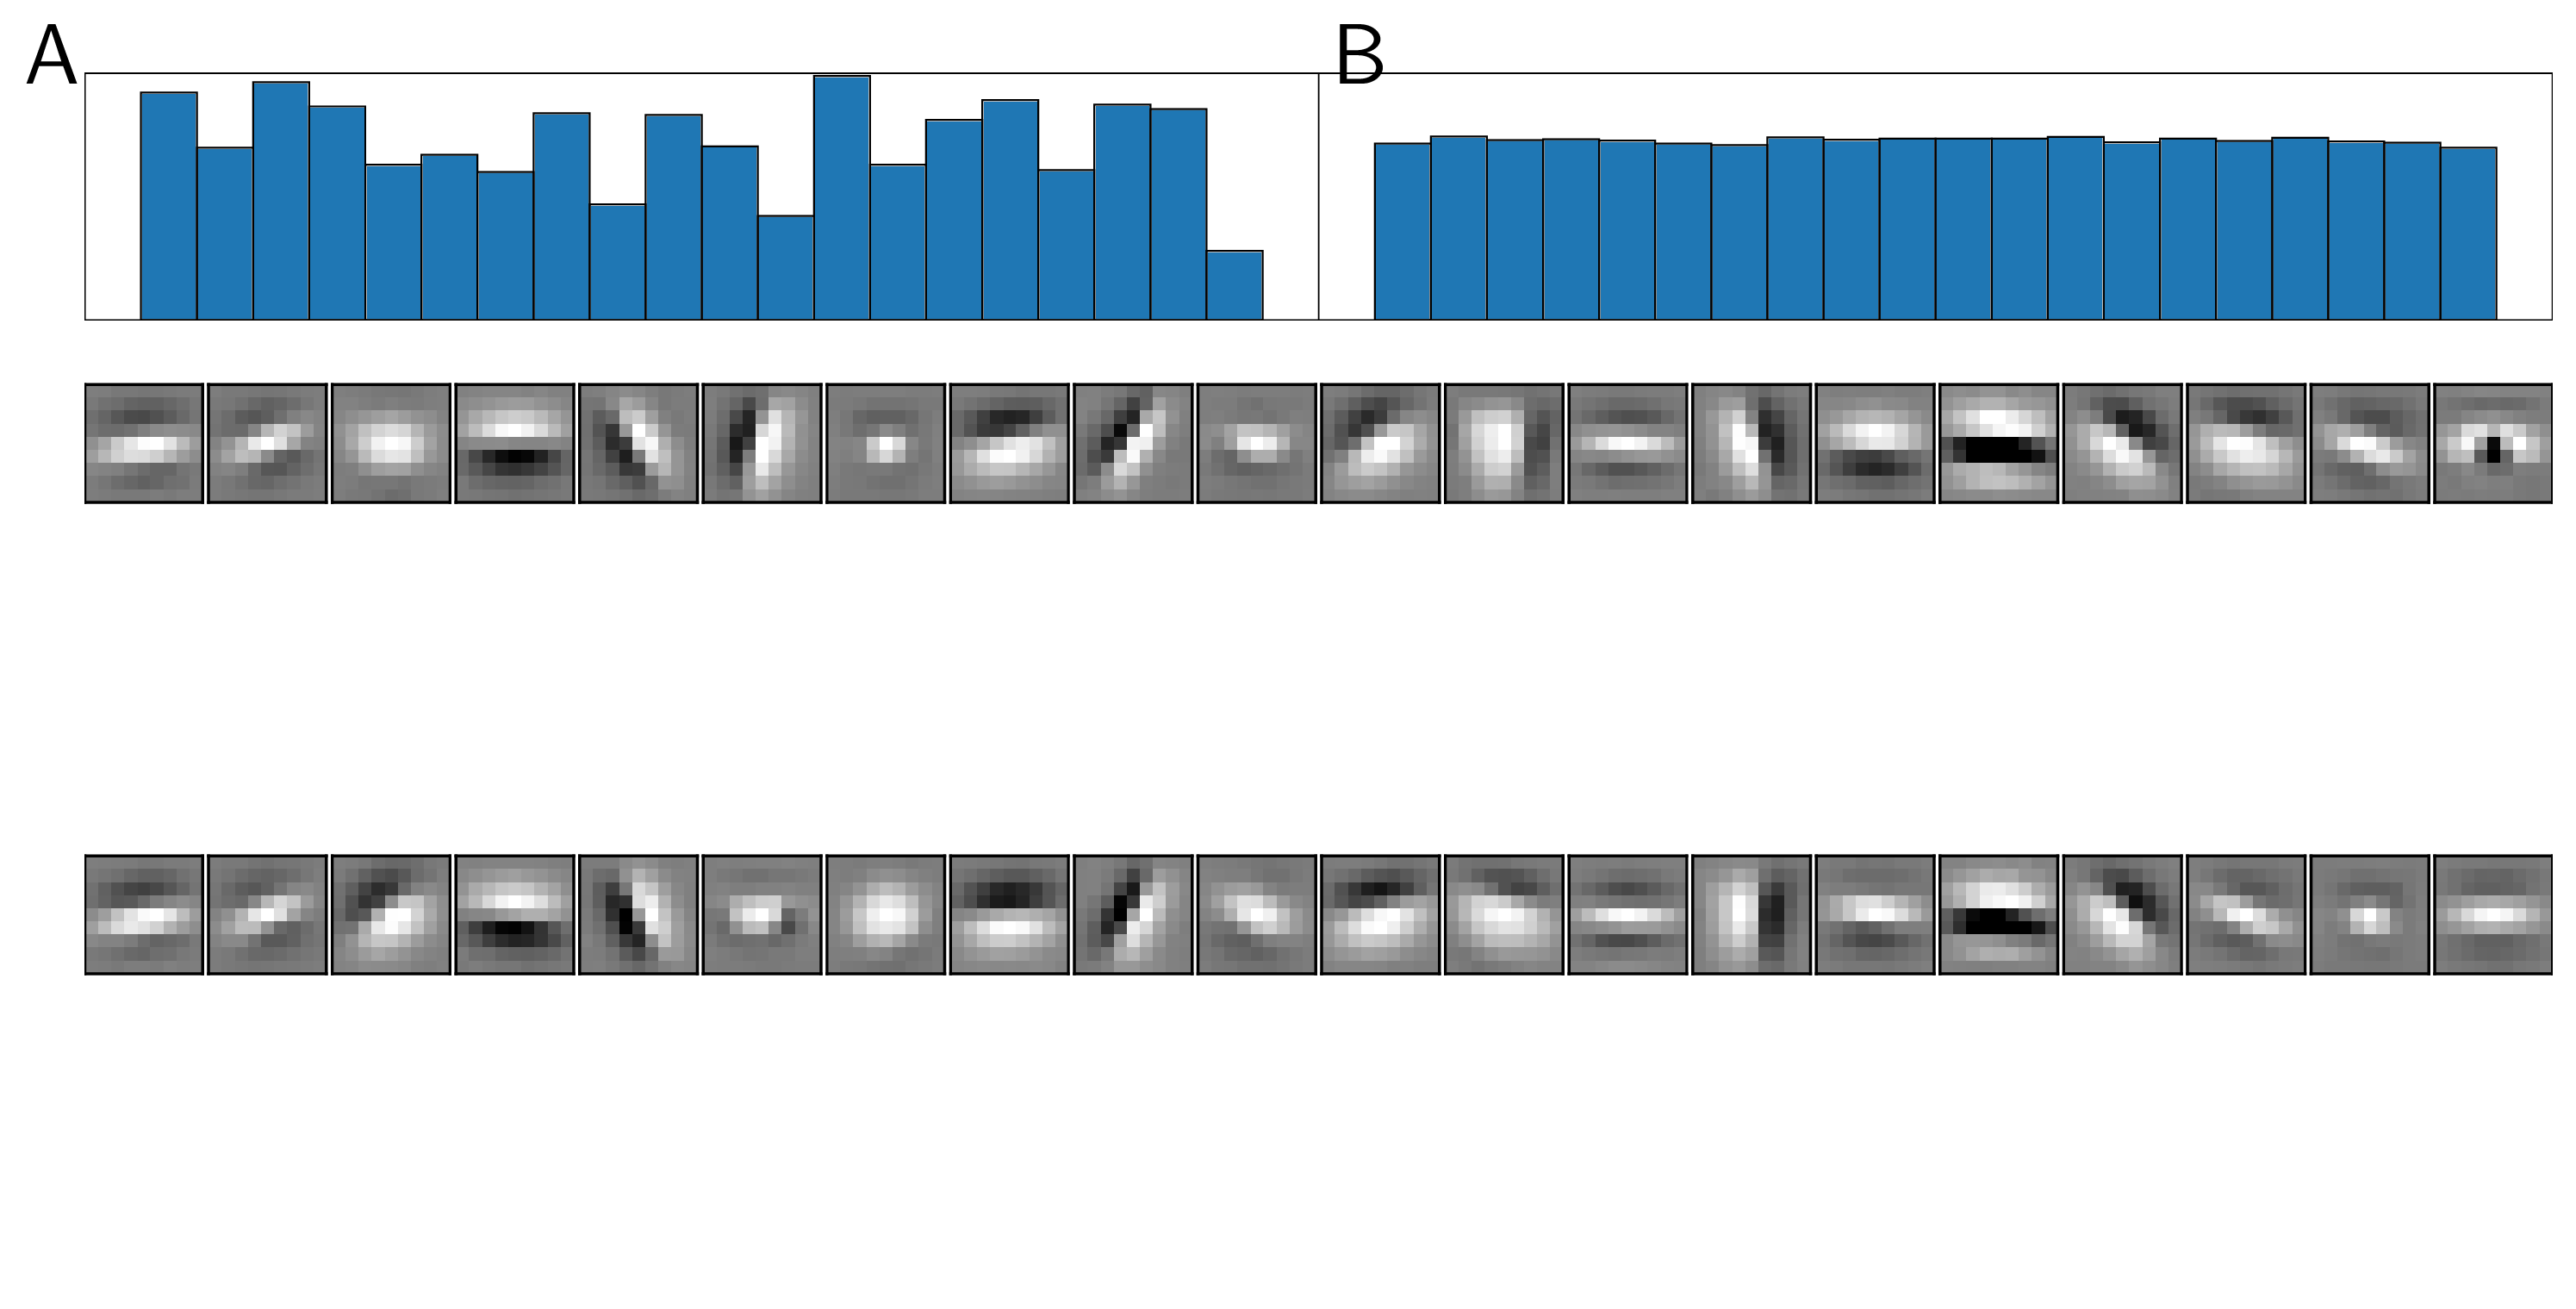

In [95]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

# Supplementary controls




## starting a learning

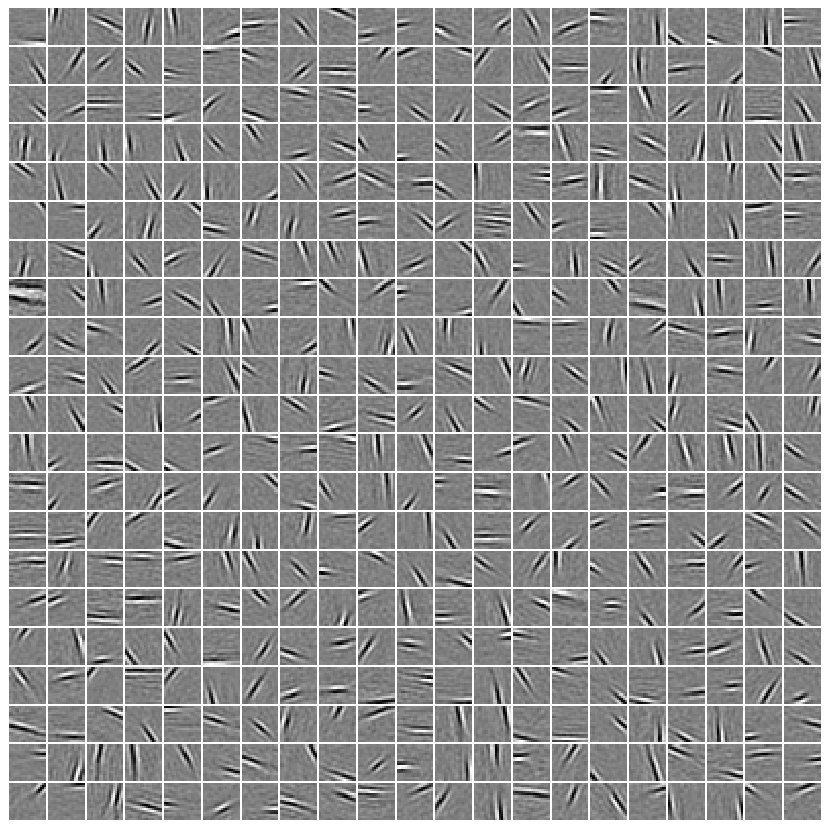

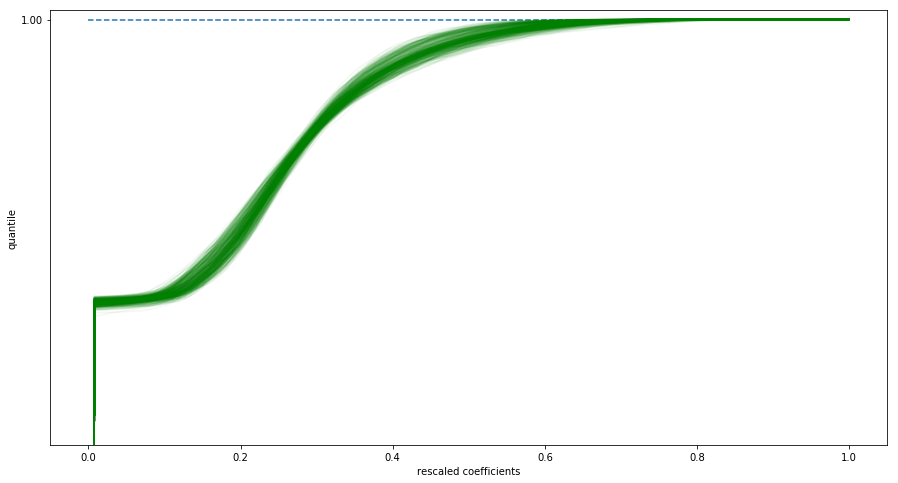

In [43]:
shl = SHL()
list_figures = ['show_dico', 'show_Pcum', 'time_plot_F']
dico = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_vanilla')

In [44]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -8.652044931295449e-08 +/- 0.00129157827604358
average energy of filters =  1.0 +/- 4.1962486042515756e-17



## getting help

In [45]:
help(shl)

Help on SHL in module shl_scripts.shl_experiments object:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_width=18, N_patches=65536, datapath='../database/', name_database='kodakdb', do_mask=True, do_bandpass=True, over_patches=16, patch_ds=1, n_dictionary=441, learning_algorithm='mp', fit_tol=None, l0_sparseness=13, alpha_MP=1.0, one_over_F=True, n_iter=1025, eta=0.007, beta1=0.9, beta2=0.999, epsilon=1e-08, do_precision=False, eta_precision=0.0005, homeo_method='HEH', eta_homeo=0.02, alpha_homeo=0.08, C=3.0, nb_quant=128, P_cum=None, do_sym=False, seed=42, patch_norm=False, batch_size=1024, record_each=32, record_num_batches=1024, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, cache_dir='cache_dir')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  

In [46]:
help(dico)

Help on SparseHebbianLearning in module shl_scripts.shl_learn object:

class SparseHebbianLearning(builtins.object)
 |  Sparse Hebbian learning
 |  
 |  Finds a dictionary (a set of atoms) that can best be used to represent data
 |  using a sparse code.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_dictionary : int,
 |      Number of dictionary elements to extract
 |  
 |  eta : float or dict
 |      Gives the learning parameter for the homeostatic gain.
 |  
 |  n_iter : int,
 |      total number of iterations to perform
 |  
 |  eta_homeo : float
 |      Gives the learning parameter for the homeostatic gain.
 |  
 |  alpha_homeo : float
 |      Gives the smoothing exponent  for the homeostatic gain
 |      If equal to 1 the homeostatic learning rule learns a linear relation to
 |      variance.
 |  
 |  dictionary : array of shape (n_dictionary, n_pixels),
 |      initial value of the dictionary for warm restart scenarios
 |      Use ``None`` for a new learning.
 |  
 |  fit_algorith


## loading a database

Loading patches, with or without mask:

<Figure size 1080x216 with 0 Axes>

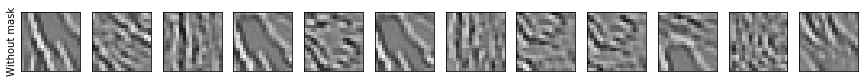

<Figure size 1080x216 with 0 Axes>

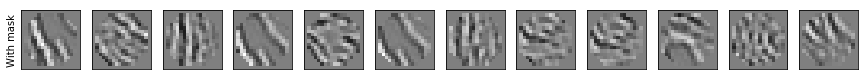

In [47]:
N_patches = 12
from shl_scripts.shl_tools import show_data

for i, (do_mask, label) in enumerate(zip([False, True], ['Without mask', 'With mask'])):
    data_ = SHL(DEBUG_DOWNSCALE=1, verbose=0, N_patches=N_patches, n_image=1, do_mask=do_mask, datapath=datapath, seed=seed).get_data()
    fig, axs = show_data(data_)
    axs[0].set_ylabel(label)
    plt.show()

## Testing different algorithms



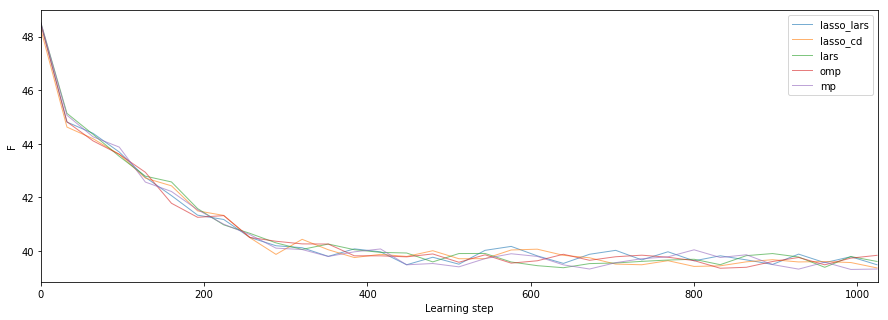

In [48]:
fig, ax = None, None

for algorithm in ['lasso_lars', 'lasso_cd', 'lars', 'omp', 'mp']: # 'threshold', 
    opts = dict(homeo_method='None', learning_algorithm=algorithm, verbose=0)
    shl = SHL(opts)
    dico= shl.learn_dico(data=data, list_figures=[],
                   matname=tag + ' - algorithm={}'.format(algorithm))
    fig, ax = shl.time_plot(dico, variable='F', fig=fig, ax=ax, label=algorithm)

ax.legend()

## Testing two different dictionary initalization strategies

White Noise Initialization + Learning

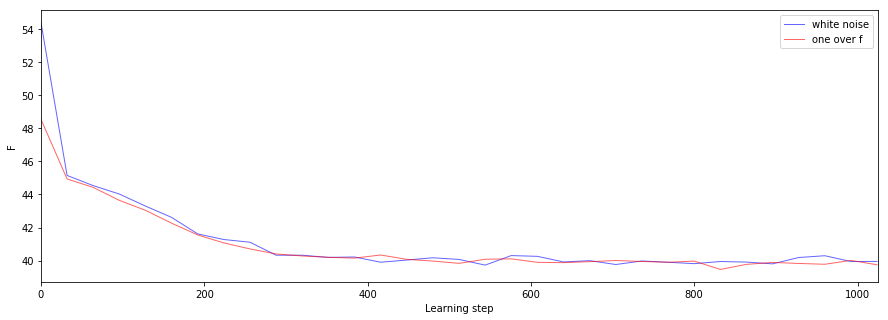

In [49]:
shl = SHL(one_over_F=False)
dico_w = shl.learn_dico(data=data, matname=tag + '_WHITE', list_figures=[])
shl = SHL(one_over_F=True)
dico_1oF = shl.learn_dico(data=data, matname=tag + '_OVF', list_figures=[])
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico_w, variable='F', fig=fig_error, ax=ax_error, color='blue', label='white noise')
fig_error, ax_error = shl.time_plot(dico_1oF, variable='F', fig=fig_error, ax=ax_error, color='red', label='one over f')
#ax_error.set_ylim((0, .65))
ax_error.legend(loc='best')

## Testing  two different learning rates strategies

We use by defaut the strategy of ADAM, see https://arxiv.org/pdf/1412.6980.pdf

AttributeError: 'str' object has no attribute 'record'

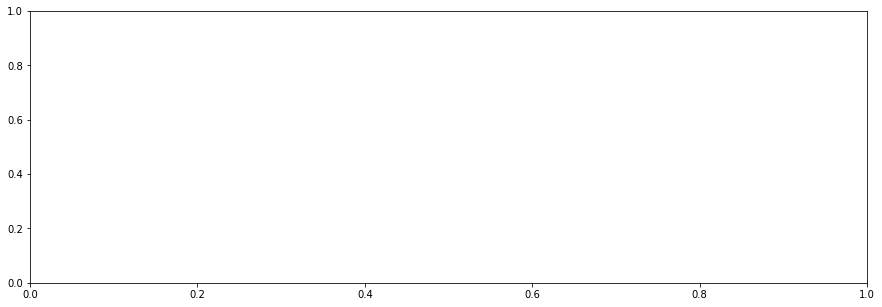

In [50]:
shl = SHL(eta=0.01, beta1=0.)
dico_fixed = shl.learn_dico(data=data, matname=tag + '_fixed', list_figures=[])
shl = SHL()
dico_default = shl.learn_dico(data=data, matname=tag + '_default', list_figures=[])
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico_fixed, variable='F', fig=fig_error, ax=ax_error, color='blue', label='fixed')
fig_error, ax_error = shl.time_plot(dico_default, variable='F', fig=fig_error, ax=ax_error, color='red', label='ADAM')
#ax_error.set_ylim((0, .65))
ax_error.legend(loc='best')

# Perspectives



## Convolutional neural networks



Size= torch.Size([1, 400, 1, 65, 65])


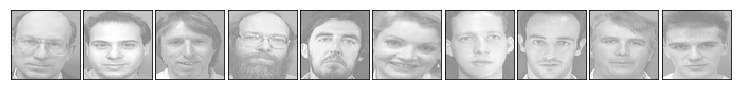

In [4]:
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere

import os
home = os.getenv('HOME')
datapath = os.path.join("/tmp", "database")
path = os.path.join(datapath, "Face_DataBase")
TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))
to_display = TrSet[0][0, 0:10, :, :, :]
print('Size=', TrSet[0].shape)
DisplayDico(to_display)

### Training on a face database


tensor([[16, 16, 16, 16, 16, 16, 16, 16, 16],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4],
        [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9],
        [16, 16, 16, 16, 16, 16, 16, 16, 16]])
tensor([[1024, 1024, 1024,  ..., 1024, 1024, 1024],
        [ 961,  961,  961,  ...,  961,  961,  961],
        [ 900,  900,  900,  ...,  900,  900,  900],
        ...,
        [ 900,  900,  900,  ...,  900,  900,  900],
        [ 961,  961,  961,  ...,  961,  961,  961],
        [1024, 1024, 1024,  ..., 1024, 1024, 1024]])
tensor([[16, 16, 16, 16, 16, 16, 16, 16, 16],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4],
        [ 1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1, 

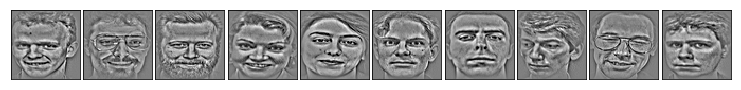

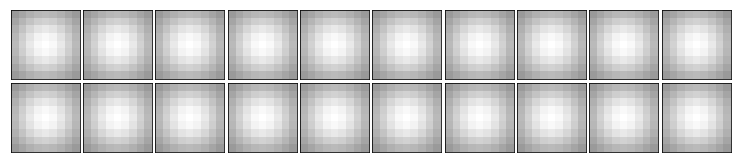

In [18]:
# MP Parameters
nb_dico = 20
width = 9
dico_size = (width, width)
l0 = 20
seed = 42
# Learning Parameters
eta = .05
nb_epoch = 500

TrSet, TeSet = LoadData('Face', path, decorrelate=False, resize=(65, 65))
N_TrSet, _, _, _ = LocalContrastNormalization(TrSet)
Filtered_L_TrSet = FilterInputData(
    N_TrSet, sigma=0.25, style='Custom', start_R=15)
to_display = Filtered_L_TrSet[0][0, 0:10, :, :, :]
DisplayDico(to_display)

mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')
DisplayDico(mask)

### Training the ConvMP Layer with homeostasis


epoch 1 - 250 done in 15m31s
epoch 250 - 500 done in 24m32s
file saved


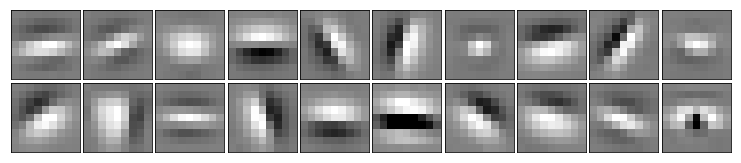

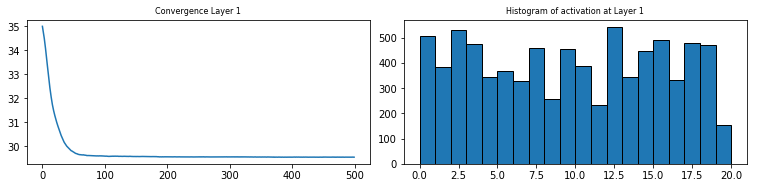

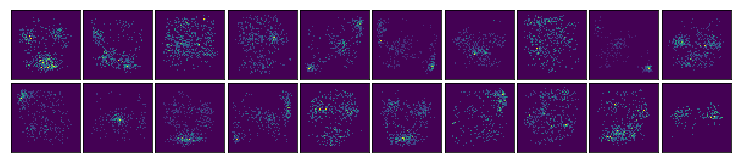

In [19]:
from CHAMP.CHAMP_Layer import CHAMP_Layer

from CHAMP.DataTools import SaveNetwork, LoadNetwork
fname = 'cache_dir/CHAMP_low_None.pkl'
try:
    L1_mask = LoadNetwork(loading_path=fname)
except:
    L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                      dico_size=dico_size, mask=mask, verbose=2)
    dico_mask = L1_mask.TrainLayer(
        Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch, seed=seed)
    SaveNetwork(Network=L1_mask, saving_path=fname)

DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)


### Training the ConvMP Layer with homeostasis


activation [  38.  389.  371.  581.  174.  149. 1103.  345.  326.  415.   71.  841.
 1126.  305.  145.  264.  190.  255.  816.   96.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  34.  393.  375.  612.  172.  169.  816.  444.  325.  403.   81.  753.
 1193.  350.  170.  287.  223.  310.  797.   93.]
Modulation [1.   1.   1.   1.   1.   1.   0.99 1.   1.   1.   1.   1.   0.99 1.
 1.   1.   1.   1.   1.   1.  ]
activation [  44.  429.  361.  585.  162.  191.  654.  526.  334.  390.  112.  696.
 1195.  402.  158.  320.  223.  348.  757.  113.]
Modulation [1.01 1.   1.   1.   1.   1.   0.99 1.   1.   1.   1.   0.99 0.99 1.
 1.   1.   1.   1.   0.99 1.  ]
activation [  48.  423.  368.  565.  134.  242.  541.  612.  320.  364.  139.  645.
 1171.  440.  173.  364.  228.  381.  718.  124.]
Modulation [1.01 1.   1.   1.   1.01 1.01 0.99 1.   1.   1.   1.01 0.99 0.98 1.
 1.01 1.   1.   1.   0.99 1.01]
activation [  45.  449.  384.  544.  144.  278.  462.  

activation [390. 411. 386. 390. 403. 402. 412. 391. 410. 411. 441. 372. 386. 391.
 409. 392. 422. 413. 398. 370.]
Modulation [1.   0.99 1.01 0.99 1.   1.01 1.02 1.   0.99 1.02 1.   1.   0.98 0.99
 1.01 0.98 1.02 1.   1.   1.  ]
activation [412. 404. 387. 385. 393. 390. 406. 381. 412. 410. 404. 412. 407. 400.
 393. 393. 417. 405. 393. 396.]
Modulation [1.   0.99 1.01 0.99 1.   1.01 1.02 1.   0.99 1.02 0.99 1.01 0.99 0.99
 1.   0.98 1.01 1.   1.   1.01]
activation [385. 394. 425. 401. 391. 428. 386. 402. 375. 412. 390. 407. 372. 400.
 411. 384. 386. 397. 419. 435.]
Modulation [0.99 0.99 1.02 0.99 1.   1.01 1.02 1.01 0.98 1.01 0.99 1.   0.98 0.99
 1.01 0.98 1.01 1.   1.   1.01]
activation [408. 394. 386. 392. 386. 409. 420. 398. 392. 378. 417. 391. 410. 394.
 405. 398. 422. 400. 405. 395.]
Modulation [1.   0.99 1.01 0.99 1.01 1.01 1.02 1.01 0.99 1.01 0.99 1.   0.99 0.99
 1.01 0.98 1.01 1.   1.   1.  ]
activation [401. 397. 416. 392. 394. 399. 367. 420. 401. 427. 376. 416. 403. 388.
 390. 

activation [408. 405. 388. 394. 402. 401. 400. 366. 390. 390. 402. 432. 397. 398.
 407. 407. 397. 391. 405. 420.]
Modulation [0.99 1.   1.01 1.   0.99 1.02 1.01 0.99 0.98 1.   1.   1.   0.99 1.01
 1.01 1.   1.01 1.   1.   1.  ]
activation [413. 396. 402. 405. 395. 402. 394. 411. 392. 415. 403. 395. 406. 403.
 394. 396. 384. 412. 390. 392.]
Modulation [0.99 1.   1.01 1.   0.99 1.02 1.01 1.   0.98 1.   1.   1.   0.99 1.01
 1.01 1.   1.01 1.   1.   0.99]
activation [385. 412. 397. 404. 401. 393. 407. 390. 403. 359. 402. 410. 393. 398.
 420. 404. 411. 388. 411. 412.]
Modulation [0.99 1.   1.01 1.   1.   1.02 1.01 0.99 0.98 1.   1.   1.   0.99 1.
 1.01 1.   1.02 1.   1.   1.  ]
activation [402. 386. 398. 391. 414. 402. 403. 401. 397. 433. 404. 376. 404. 400.
 373. 403. 396. 394. 407. 416.]
Modulation [0.99 1.   1.01 1.   1.   1.02 1.01 1.   0.98 1.01 0.99 1.   0.99 1.01
 1.   1.   1.01 1.   1.   0.99]
activation [395. 391. 397. 401. 403. 404. 398. 396. 393. 401. 389. 412. 412. 403.
 394. 40

activation [376. 396. 406. 404. 402. 404. 393. 406. 395. 381. 400. 413. 392. 398.
 405. 418. 402. 397. 406. 406.]
Modulation [0.99 1.   1.01 1.   0.99 1.02 1.   1.   0.99 1.   1.   1.   0.99 0.99
 1.   1.   1.01 1.   1.   0.99]
activation [440. 391. 404. 397. 401. 397. 395. 392. 401. 424. 404. 390. 396. 396.
 383. 392. 401. 407. 403. 386.]
Modulation [1.   1.   1.01 1.   0.99 1.02 1.01 1.   0.99 1.01 1.   1.   0.99 0.99
 1.   0.99 1.01 1.   1.   0.99]
activation [412. 408. 398. 395. 402. 402. 403. 412. 400. 407. 398. 383. 407. 403.
 393. 381. 401. 402. 403. 390.]
Modulation [0.99 1.   1.01 1.   0.99 1.02 1.01 1.   0.99 1.01 1.   1.   0.99 0.99
 1.   0.99 1.01 1.   1.   0.99]
activation [359. 391. 408. 405. 398. 401. 389. 337. 402. 372. 411. 448. 377. 401.
 435. 445. 398. 396. 402. 425.]
Modulation [0.99 1.   1.01 1.   0.98 1.01 1.   1.   0.99 1.   1.   1.01 0.99 0.99
 1.01 1.   1.01 1.   1.   1.  ]
activation [378. 383. 405. 415. 401. 398. 396. 412. 398. 396. 392. 429. 383. 409.
 399. 

activation [391. 405. 411. 403. 405. 402. 393. 411. 399. 403. 394. 399. 409. 390.
 378. 410. 401. 399. 396. 401.]
Modulation [0.99 1.   1.01 1.   0.99 1.02 1.   1.   1.   1.   1.   1.   0.99 1.
 1.   1.   1.01 1.   1.   1.  ]
activation [449. 393. 377. 371. 396. 392. 408. 326. 397. 384. 460. 400. 380. 408.
 464. 381. 396. 403. 409. 406.]
Modulation [1.   1.   1.   0.99 0.99 1.01 1.01 0.99 1.   1.   1.   1.   0.99 1.
 1.01 0.99 1.01 1.   1.   1.  ]
activation [416. 394. 377. 395. 398. 395. 421. 396. 399. 394. 419. 395. 388. 406.
 432. 381. 399. 397. 406. 392.]
Modulation [0.99 1.   1.   1.   0.99 1.01 1.   1.   1.   1.   1.   1.   0.99 1.
 1.   0.99 1.01 1.   1.   1.  ]
activation [400. 395. 401. 420. 393. 403. 398. 428. 403. 402. 377. 400. 389. 404.
 364. 411. 401. 407. 398. 406.]
Modulation [0.99 1.   1.01 1.   0.99 1.02 1.   1.   1.   1.   0.99 1.   0.99 1.
 1.   1.   1.01 1.   1.   1.  ]
activation [390. 410. 399. 391. 395. 395. 393. 361. 403. 408. 399. 413. 412. 400.
 424. 407. 394

activation [404. 387. 410. 402. 407. 406. 414. 402. 391. 406. 365. 402. 378. 399.
 399. 382. 393. 404. 400. 449.]
Modulation [0.99 1.   1.01 0.99 0.99 1.01 1.   1.   0.99 1.01 0.99 1.   0.99 1.
 1.   0.99 1.01 1.   1.   1.  ]
activation [414. 383. 404. 405. 405. 399. 409. 405. 397. 422. 384. 401. 378. 404.
 393. 394. 389. 397. 405. 412.]
Modulation [0.99 1.   1.01 0.99 0.99 1.01 1.   1.   1.   1.01 1.   1.   0.99 1.
 1.   0.99 1.01 1.   1.   1.  ]
activation [379. 414. 381. 394. 397. 396. 392. 398. 407. 393. 438. 407. 398. 400.
 425. 413. 403. 413. 398. 354.]
Modulation [0.99 1.   1.01 0.99 0.99 1.01 1.   1.   1.   1.   1.   1.   1.   1.
 1.   0.99 1.01 1.   1.   0.99]
activation [391. 403. 403. 396. 401. 397. 402. 404. 406. 383. 395. 393. 420. 396.
 400. 383. 413. 395. 389. 430.]
Modulation [0.99 1.   1.01 0.99 0.99 1.01 1.   1.   1.   1.   1.   1.   1.   1.
 1.   0.99 1.01 1.   1.   1.  ]
activation [415. 393. 414. 403. 408. 399. 400. 398. 395. 401. 383. 404. 404. 392.
 395. 410. 400

activation [405. 385. 428. 398. 401. 391. 398. 432. 392. 422. 397. 363. 417. 397.
 403. 370. 394. 399. 424. 384.]
Modulation [0.99 1.   1.01 0.99 0.98 1.01 1.   1.   1.   1.01 1.   1.   1.   1.01
 1.   0.99 1.01 1.   1.01 0.99]
activation [390. 407. 397. 390. 393. 394. 393. 369. 398. 413. 424. 398. 408. 411.
 416. 406. 400. 390. 403. 400.]
Modulation [0.99 1.   1.01 0.99 0.98 1.02 1.   1.   1.   1.   1.   1.   1.   1.01
 1.   1.   1.01 1.   1.01 1.  ]
activation [408. 397. 403. 400. 399. 408. 393. 443. 405. 382. 351. 417. 398. 400.
 375. 389. 411. 405. 400. 416.]
Modulation [0.99 1.   1.01 1.   0.98 1.02 1.   1.   1.   1.   0.99 1.   0.99 1.
 1.   0.99 1.01 1.   1.01 1.  ]
activation [401. 397. 396. 414. 402. 408. 398. 408. 406. 399. 393. 402. 387. 397.
 383. 402. 405. 399. 400. 403.]
Modulation [0.99 1.   1.01 1.   0.98 1.02 1.   1.   1.   1.   1.   1.   0.99 1.
 1.   1.   1.01 1.   1.01 1.  ]
activation [387. 406. 393. 376. 402. 392. 403. 343. 402. 394. 453. 402. 408. 403.
 468. 402.

activation [424. 396. 393. 392. 399. 405. 395. 382. 405. 412. 438. 371. 386. 407.
 391. 417. 401. 398. 410. 378.]
Modulation [0.99 1.   1.01 0.99 0.98 1.02 1.   1.   1.   1.01 1.   1.   0.99 1.
 1.   1.   1.01 1.   1.01 1.  ]
activation [402. 400. 405. 401. 407. 405. 388. 405. 396. 381. 407. 397. 386. 404.
 392. 390. 404. 413. 401. 416.]
Modulation [0.99 1.   1.01 1.   0.98 1.02 1.   1.   1.   1.   1.   1.   0.99 1.
 1.   0.99 1.01 1.   1.01 1.  ]
activation [385. 403. 399. 404. 396. 403. 401. 401. 404. 436. 374. 412. 407. 397.
 413. 416. 392. 388. 402. 367.]
Modulation [0.99 1.   1.01 1.   0.98 1.01 1.   1.   1.   1.01 0.99 1.   1.   1.
 1.   1.   1.01 1.   1.01 0.99]
activation [393. 397. 390. 401. 394. 396. 417. 386. 400. 402. 389. 414. 418. 396.
 411. 394. 401. 399. 404. 398.]
Modulation [0.99 1.   1.01 0.99 0.98 1.01 1.   1.   1.   1.   1.   1.   1.   1.
 1.   0.99 1.01 1.   1.01 1.  ]
activation [412. 397. 397. 398. 402. 402. 396. 424. 399. 389. 418. 375. 388. 395.
 381. 409. 404

activation [403. 396. 391. 380. 409. 394. 405. 334. 396. 409. 439. 398. 393. 394.
 482. 420. 403. 401. 389. 364.]
Modulation [0.99 1.   1.01 0.99 0.98 1.01 1.   0.99 1.   1.01 1.   1.   1.   1.
 1.01 1.   1.01 1.   1.   0.99]
activation [411. 399. 396. 370. 410. 405. 404. 382. 396. 414. 425. 388. 393. 398.
 434. 411. 396. 401. 388. 379.]
Modulation [0.99 1.   1.01 0.99 0.98 1.02 1.   1.   1.   1.01 1.   1.   1.   1.
 1.   1.   1.01 1.   1.01 1.  ]
activation [405. 402. 410. 419. 401. 403. 396. 425. 396. 392. 376. 395. 397. 400.
 379. 395. 400. 404. 395. 410.]
Modulation [0.99 1.   1.01 1.   0.98 1.01 1.   1.   1.   1.   0.99 1.   1.   1.
 1.   0.99 1.01 1.   1.01 1.  ]
activation [386. 397. 396. 401. 399. 398. 399. 383. 404. 402. 412. 417. 396. 397.
 407. 408. 400. 391. 398. 409.]
Modulation [0.99 1.   1.   0.99 0.98 1.01 1.   1.   1.   1.01 1.   1.   1.   1.
 1.   1.   1.01 1.   1.01 1.  ]
activation [423. 393. 391. 390. 399. 400. 407. 430. 399. 403. 398. 387. 407. 404.
 393. 384. 400

activation [421. 395. 403. 384. 395. 398. 398. 386. 398. 383. 416. 414. 400. 402.
 421. 405. 409. 388. 405. 379.]
Modulation [1.   1.   1.01 0.99 0.97 1.02 1.   1.   1.   1.   1.   1.   1.   1.01
 1.   1.   1.01 1.   1.01 0.99]
activation [384. 407. 408. 407. 392. 408. 403. 428. 398. 416. 385. 387. 397. 407.
 379. 390. 393. 387. 405. 419.]
Modulation [0.99 1.   1.01 0.99 0.98 1.02 1.   1.   1.   1.01 0.99 1.   1.   1.
 1.   0.99 1.01 1.   1.01 1.  ]
activation [395. 398. 397. 401. 398. 401. 406. 387. 400. 398. 410. 400. 401. 398.
 401. 411. 391. 409. 400. 398.]
Modulation [0.99 1.   1.01 0.99 0.98 1.01 1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.01 1.   1.01 1.  ]
activation [430. 395. 408. 393. 397. 397. 379. 441. 405. 392. 364. 408. 409. 403.
 403. 375. 416. 386. 406. 393.]
Modulation [1.   1.   1.01 0.99 0.98 1.01 1.   1.   1.   1.   0.99 1.   1.   1.
 1.   0.99 1.01 1.   1.01 1.  ]
activation [398. 404. 397. 416. 399. 398. 386. 405. 402. 411. 392. 405. 404. 401.
 393. 393. 4

activation [408. 395. 404. 394. 394. 392. 402. 405. 403. 390. 410. 398. 399. 403.
 399. 390. 393. 389. 416. 416.]
Modulation [1.   1.   1.01 1.   0.98 1.01 1.   1.   1.   1.   1.   1.   1.   1.01
 1.   1.   1.01 1.   1.01 1.  ]
activation [373. 412. 399. 427. 397. 413. 394. 374. 401. 413. 384. 407. 406. 403.
 423. 421. 405. 412. 380. 356.]
Modulation [0.99 1.   1.01 1.   0.98 1.02 1.   0.99 1.   1.   0.99 1.   1.   1.
 1.   1.   1.01 1.   1.01 0.99]
activation [417. 398. 392. 375. 408. 406. 401. 422. 395. 405. 393. 401. 400. 398.
 376. 395. 401. 403. 394. 420.]
Modulation [1.   1.   1.01 0.99 0.98 1.01 1.   1.   1.   1.   1.   1.   1.   1.
 1.   0.99 1.01 1.   1.01 1.  ]
activation [393. 390. 406. 419. 399. 395. 403. 360. 400. 389. 428. 393. 404. 395.
 418. 398. 399. 394. 407. 410.]
Modulation [0.99 1.   1.01 1.   0.98 1.01 1.   0.99 1.   1.   1.   1.   1.   1.
 1.01 1.   1.01 1.   1.01 1.  ]
activation [392. 408. 406. 394. 407. 400. 397. 446. 401. 401. 376. 398. 397. 396.
 400. 412. 3

activation [408. 399. 429. 366. 407. 401. 405. 493. 388. 392. 333. 386. 391. 397.
 376. 392. 400. 401. 402. 434.]
Modulation [1.   1.   1.01 0.99 0.98 1.01 1.   1.   1.   1.   0.99 1.   1.   1.
 1.   0.99 1.01 1.   1.01 1.  ]
activation [407. 401. 430. 395. 406. 408. 405. 429. 394. 390. 362. 385. 392. 395.
 383. 393. 397. 391. 404. 433.]
Modulation [1.   1.   1.01 1.   0.98 1.01 1.   1.   1.   1.   0.99 1.   1.   1.
 1.   1.   1.01 1.   1.01 1.  ]
activation [396. 407. 397. 389. 406. 411. 392. 360. 408. 394. 435. 406. 400. 401.
 426. 409. 400. 396. 401. 366.]
Modulation [0.99 1.   1.   1.   0.98 1.01 1.   0.99 1.   1.   1.   1.   1.   1.01
 1.01 1.   1.01 1.   1.01 0.99]
activation [400. 399. 397. 406. 406. 393. 401. 405. 398. 401. 392. 396. 410. 401.
 396. 385. 394. 418. 399. 403.]
Modulation [1.   1.   1.   1.   0.98 1.01 1.   1.   1.   1.   0.99 1.   1.   1.01
 1.   0.99 1.01 1.   1.01 1.  ]
activation [394. 401. 394. 396. 396. 393. 398. 401. 402. 415. 403. 401. 386. 398.
 400. 432.

activation [403. 388. 398. 399. 397. 406. 402. 407. 402. 403. 385. 400. 406. 396.
 388. 382. 392. 401. 403. 442.]
Modulation [1.   1.   1.01 1.   0.98 1.01 1.   1.   1.   1.   0.99 1.   1.   1.01
 1.   0.99 1.01 1.   1.01 1.  ]
activation [391. 395. 399. 412. 398. 405. 404. 411. 404. 393. 391. 398. 412. 402.
 397. 391. 396. 391. 403. 407.]
Modulation [1.   1.   1.01 1.   0.98 1.01 1.   1.   1.   1.   1.   1.   1.   1.01
 1.   1.   1.01 1.   1.01 1.  ]
activation [416. 406. 403. 365. 399. 397. 397. 362. 393. 419. 440. 406. 379. 400.
 415. 446. 399. 410. 387. 361.]
Modulation [1.   1.01 1.01 0.99 0.98 1.01 1.   0.99 1.   1.   1.   1.   1.   1.01
 1.   1.   1.01 1.   1.01 0.99]
activation [413. 406. 404. 384. 409. 390. 397. 386. 398. 402. 403. 401. 387. 394.
 393. 415. 402. 421. 397. 398.]
Modulation [1.   1.   1.01 1.   0.98 1.01 1.   1.   1.   1.   0.99 1.   1.   1.01
 1.   0.99 1.01 1.   1.01 1.  ]
activation [393. 402. 406. 425. 401. 397. 396. 427. 407. 393. 380. 392. 401. 400.
 401. 

activation [391. 398. 395. 398. 400. 398. 399. 402. 396. 416. 409. 403. 394. 403.
 403. 381. 390. 392. 407. 425.]
Modulation [0.99 1.   1.   1.   0.98 1.01 1.   1.   1.   1.   1.   1.   1.   1.01
 1.   0.99 1.01 1.   1.01 1.  ]
activation [399. 402. 408. 405. 399. 406. 402. 400. 396. 391. 397. 397. 405. 403.
 398. 437. 395. 404. 402. 354.]
Modulation [1.   1.   1.01 1.   0.98 1.01 1.   1.   1.   1.   0.99 1.   1.   1.01
 1.   1.   1.01 1.   1.01 0.99]
activation [403. 394. 401. 393. 404. 401. 405. 400. 404. 391. 390. 391. 396. 397.
 400. 398. 408. 410. 401. 413.]
Modulation [1.   1.   1.   1.   0.98 1.01 1.   1.   1.   1.   1.   1.   1.   1.01
 1.   0.99 1.01 1.   1.01 1.  ]
activation [403. 404. 398. 407. 403. 396. 389. 391. 398. 420. 415. 419. 401. 405.
 402. 396. 388. 390. 391. 384.]
Modulation [1.   1.01 1.   1.   0.98 1.01 1.   1.   1.   1.   1.   1.   1.   1.01
 1.   0.99 1.01 1.   1.01 0.99]
activation [387. 403. 404. 400. 393. 398. 408. 412. 402. 403. 391. 400. 400. 404.
 395. 

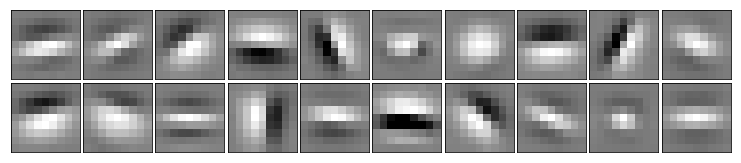

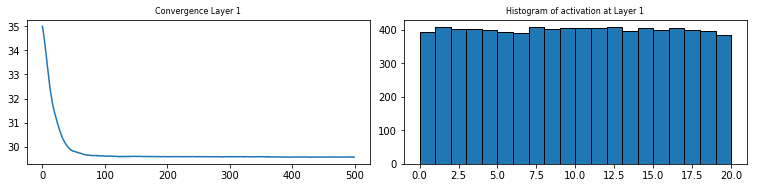

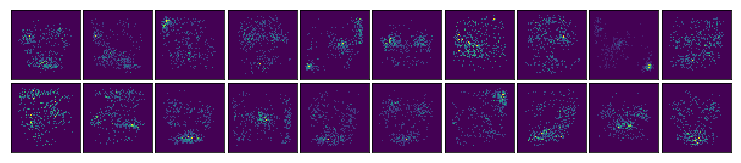

In [20]:
fname = 'cache_dir/CHAMP_low_HAP.pkl'
try:
    L1_mask = LoadNetwork(loading_path=fname)
except:

    # Learning Parameters
    eta_homeo = 0.0025
    L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                          dico_size=dico_size, mask=mask, verbose=1)
    dico_mask = L1_mask.TrainLayer(
        Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)
    SaveNetwork(Network=L1_mask, saving_path=fname)

DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)

### Reconstructing the input image

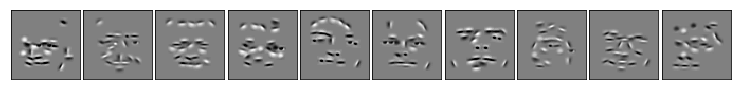

In [21]:
from CHAMP.DataTools import Rebuilt
import torch
rebuilt_image = Rebuilt(torch.FloatTensor(L1_mask.code), L1_mask.dictionary)
DisplayDico(rebuilt_image[0:10, :, :, :])

### Training the ConvMP Layer with higher-level filters

We train higher-level feature vectors by forcing the network to :

- learn bigger filters,
- represent the information using a bigger dictionary (higher sparseness)
- represent the information with less features (higher sparseness)



activation [ 70. 111.  27.  23.  45.  27.  72.  28.  22.  64.  39.  60.  35.  17.
   1.  31.   6.  53.   8.  64.   3.   5.  18.  75.  26.  27.  35.   4.
  20.  70.  70.   6.  39.   4.  25.  82.  41.  32.  19.  70.   4.  38.
  28.  36.   8.  30.  25.  36.  70.  14.   9.  19.  22.  40.  13.  41.
  21.  12.  41.  19.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [ 71. 106.  24.  27.  49.  25.  56.  24.  20.  62.  45.  50.  37.  23.
   1.  30.   8.  46.   7.  63.   4.   3.  22.  92.  23.  20.  35.   6.
  18.  56.  67.   4.  38.  11.  23.  86.  51.  30.  20.  62.   5.  42.
  33.  39.   6.  48.  20.  38.  99.  10.   5.  18.  23.  37.  14.  36.
  15.  10.  34.  23.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [ 20.  38.  56.  16.  38.  18.  12.  40.  19.  45.  55.  17.  60.  82.
  10.  43.   3.  13.   5.  38.  31.   4.  26. 119.  34.  10.  27.   5.
   9.  22. 178.   5.  23.  28.  17.  13.  85.  14.  49.  23.  16.  35.
  29.  12.  18. 114.   4.  14.  69.  10.  14.  12.  41.  55.  78.  32.
   4.  20.  55.  18.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [ 18.  35.  57.  16.  35.  18.  11.  41.  20.  44.  51.  19.  61.  85.
  10.  40.   3.  11.   5.  41.  34.   4.  29. 126.  35.  12.  24.   5.
   8.  18. 174.   5.  25.  27.  18.  12.  83.  14.  57.  24.  19.  34.
  26.  11.  18. 112.   4.  13.  61.  10.  14.  11.  46.  56.  75.  33.
   5.  21.  58.  18.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [ 13.  18.  83.  15.  17.  38.  13.  32.  21.  21.  19.  40.  40. 106.
  11.  29.   3.   7.   9.  54.  50.   4.  19. 114.  56.  14.  26.  14.
   9.  44. 149.   6.  49.  18.  13.   2.  87.   4.  75.  33.  23.  12.
  23.   8.  31. 117.   3.   7.  40.  11.  17.  10.  46.  73.  57.  40.
   3.  23.  70.  11.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [ 14.  18.  83.  15.  16.  40.  13.  31.  20.  20.  18.  42.  34. 108.
  11.  27.   3.   7.   9.  54.  50.   4.  20. 112.  55.  16.  25.  14.
   9.  44. 151.   6.  46.  19.  13.   2.  85.   4.  79.  34.  24.  13.
  26.   8.  32. 117.   2.   6.  39.  11.  17.  10.  46.  72.  56.  40.
   3.  22.  74.  11.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  9.  17.  79.  41.  15.  55.  14.  20.   9.  15.  13.  41.  15. 109.
  10.  20.   3.   5.  16.  54.  50.   4.  32.  84.  39.  21.  39.  16.
   8.  39.  91.   6.  62.  25.   8.   1.  68.   1. 134.  29.  29.  13.
  36.  14.  30. 130.   1.   7.  43.  11.   9.  10.  37.  79.  65.  30.
   3.  34.  94.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  8.  17.  76.  41.  12.  55.  12.  21.   8.  15.  13.  40.  16. 109.
  11.  23.   3.   5.  16.  54.  52.   4.  31.  86.  41.  21.  41.  16.
   8.  39.  90.   6.  63.  25.   9.   1.  65.   1. 135.  29.  29.  14.
  37.  16.  29. 128.   1.   7.  42.  11.   9.  10.  36.  78.  64.  30.
   3.  34.  96.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  7.  17.  66.  44.  10.  64.  11.  14.   9.  17.  13.  39.   9. 107.
  16.  22.   3.   4.  16.  77.  51.   4.  26.  81.  43.  23.  50.  15.
   8.  30.  78.   7.  80.  29.   9.   1.  62.   1. 135.  30.  33.  11.
  38.  15.  27. 118.   1.   7.  50.  11.   9.  10.  32.  74.  64.  26.
   3.  35. 100.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  7.  17.  66.  44.  11.  65.  11.  14.   9.  17.  13.  39.   9. 107.
  16.  22.   3.   4.  16.  78.  51.   4.  26.  80.  42.  23.  51.  15.
   8.  30.  79.   7.  79.  29.   9.   1.  62.   1. 137.  30.  33.  11.
  39.  15.  27. 116.   1.   7.  49.  11.   9.  10.  32.  74.  64.  26.
   3.  34.  99.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  7.  17.  63.  43.  17.  65.  10.  16.   9.  19.  12.  36.   9.  97.
  16.  22.   3.   5.  16.  84.  52.   4.  32.  75.  39.  21.  54.  15.
   8.  29.  76.   7.  84.  29.   9.   1.  59.   1. 135.  29.  31.  11.
  47.  16.  28. 113.   1.   7.  47.  11.   9.  10.  34.  68.  64.  27.
   2.  44.  97.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  7.  17.  63.  43.  17.  65.  10.  16.   9.  19.  12.  36.   9.  96.
  16.  22.   3.   5.  16.  84.  52.   4.  32.  74.  39.  21.  54.  15.
   8.  29.  76.   7.  84.  29.   9.   1.  59.   1. 136.  28.  31.  11.
  49.  16.  28. 113.   1.   7.  47.  11.   9.  10.  34.  68.  64.  27.
   2.  44.  97.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  6.  17.  60.  44.  17.  67.  11.  16.   8.  20.  12.  34.   9.  96.
  16.  22.   3.   5.  16.  84.  53.   4.  33.  70.  34.  21.  59.  16.
   8.  28.  72.   7.  87.  27.   9.   1.  62.   1. 148.  29.  30.  11.
  52.  16.  28. 109.   1.   7.  46.  11.   9.  10.  32.  67.  63.  27.
   2.  46.  93.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  6.  17.  59.  44.  17.  67.  11.  16.   8.  20.  12.  34.   9.  95.
  16.  22.   3.   5.  16.  86.  53.   4.  33.  70.  34.  21.  59.  16.
   8.  28.  72.   7.  87.  27.   9.   1.  63.   1. 147.  29.  31.  11.
  53.  16.  28. 108.   1.   7.  46.  11.   9.  10.  32.  67.  63.  27.
   2.  46.  92.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  55.  46.  17.  68.  12.  17.   8.  19.  12.  33.   9.  99.
  16.  22.   3.   4.  16.  92.  53.   4.  38.  68.  31.  20.  53.  18.
   8.  28.  73.   7.  87.  36.   9.   1.  62.   1. 139.  29.  31.  11.
  65.  15.  29. 104.   1.   7.  46.  11.   9.  10.  29.  65.  61.  29.
   2.  43.  89.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  55.  46.  17.  68.  12.  17.   8.  19.  12.  33.   9.  99.
  16.  22.   3.   4.  16.  93.  53.   4.  38.  68.  30.  20.  53.  18.
   8.  28.  74.   7.  87.  36.   9.   1.  62.   1. 138.  29.  31.  11.
  65.  15.  29. 104.   1.   7.  46.  11.   9.  10.  29.  65.  61.  29.
   2.  43.  89.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  46.  17.  67.  12.  16.   8.  19.  12.  33.  10. 102.
  16.  22.   3.   4.  16.  96.  53.   4.  39.  70.  28.  20.  54.  20.
   8.  28.  71.   6.  86.  33.   9.   1.  63.   1. 138.  28.  31.  11.
  68.  16.  29. 105.   1.   7.  46.  11.   9.  10.  31.  62.  60.  29.
   2.  43.  87.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  45.  17.  67.  12.  16.   8.  19.  12.  33.  10. 102.
  16.  22.   3.   4.  16.  96.  53.   4.  39.  70.  28.  20.  54.  22.
   8.  28.  71.   6.  86.  33.   9.   1.  63.   1. 137.  28.  31.  11.
  69.  16.  29. 105.   1.   7.  46.  11.   9.  10.  30.  62.  60.  29.
   2.  43.  87.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  52.  47.  17.  67.  12.  16.   8.  19.  12.  33.  10. 103.
  16.  24.   3.   4.  16.  95.  53.   4.  39.  70.  28.  20.  55.  25.
   8.  26.  70.   6.  86.  34.   9.   1.  62.   1. 134.  28.  32.  11.
  70.  15.  28. 108.   1.   7.  46.  11.   9.  10.  30.  61.  60.  27.
   2.  43.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  52.  47.  17.  67.  12.  16.   8.  19.  12.  33.  10. 104.
  16.  24.   3.   4.  16.  95.  53.   4.  39.  70.  28.  20.  55.  25.
   8.  26.  70.   6.  86.  34.   9.   1.  62.   1. 134.  28.  32.  11.
  69.  15.  28. 108.   1.   7.  46.  11.   9.  10.  30.  61.  60.  27.
   2.  43.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  52.  47.  17.  67.  12.  16.   8.  19.  12.  33.  10. 107.
  16.  24.   3.   4.  16.  96.  53.   4.  39.  70.  28.  20.  55.  25.
   8.  26.  69.   6.  86.  34.   9.   1.  61.   1. 134.  29.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  61.  61.  24.
   2.  43.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  52.  47.  17.  67.  12.  16.   8.  19.  12.  33.  10. 107.
  16.  24.   3.   4.  16.  96.  53.   4.  39.  70.  28.  20.  55.  25.
   8.  26.  69.   6.  86.  34.   9.   1.  61.   1. 134.  29.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  61.  61.  24.
   2.  43.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  52.  47.  17.  66.  12.  16.   8.  19.  12.  33.  10. 107.
  16.  24.   3.   4.  16.  96.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  86.  34.   9.   1.  61.   1. 134.  29.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  61.  61.  24.
   2.  43.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  52.  47.  17.  66.  12.  16.   8.  19.  12.  33.  10. 107.
  16.  24.   3.   4.  16.  96.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  86.  34.   9.   1.  61.   1. 134.  29.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  61.  61.  24.
   2.  43.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  66.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  34.   9.   1.  61.   1. 133.  29.  34.  11.
  66.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  66.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  34.   9.   1.  61.   1. 133.  29.  34.  11.
  66.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  67.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  33.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  67.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  33.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  71.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  86.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  61.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 133.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  44.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 132.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 132.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  85.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 132.  28.  34.  11.
  67.  15.  28. 110.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 132.  28.  34.  11.
  67.  15.  28. 110.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  17.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 132.  28.  34.  11.
  67.  15.  28. 110.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  18.  53.  47.  17.  68.  12.  16.   8.  19.  12.  32.  10. 108.
  16.  24.   3.   4.  16.  97.  53.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  83.  32.   9.   1.  62.   1. 132.  28.  34.  11.
  67.  15.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  18.  53.  47.  17.  68.  11.  16.   8.  19.  12.  32.  10. 109.
  16.  24.   3.   4.  16.  97.  52.   4.  39.  72.  28.  20.  55.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  62.   1. 131.  28.  34.  11.
  67.  16.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  18.  53.  47.  17.  68.  10.  16.   8.  19.  12.  31.  10. 109.
  16.  24.   3.   4.  16.  97.  52.   4.  39.  73.  28.  20.  56.  25.
   8.  26.  69.   6.  84.  32.   9.   1.  62.   1. 131.  28.  34.  11.
  67.  16.  28. 109.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  18.  53.  47.  17.  68.  10.  16.   8.  19.  12.  31.  10. 109.
  16.  24.   3.   4.  16.  97.  52.   4.  39.  73.  28.  20.  56.  25.
   8.  26.  69.   6.  82.  32.   9.   1.  62.   1. 131.  28.  34.  11.
  67.  17.  28. 110.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  18.  53.  47.  17.  68.  10.  16.   8.  19.  12.  31.  10. 109.
  16.  24.   3.   4.  16.  97.  52.   4.  39.  73.  28.  20.  56.  25.
   8.  26.  69.   6.  82.  32.   9.   1.  62.   1. 131.  28.  34.  11.
  67.  17.  28. 110.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  18.  53.  47.  17.  68.  10.  16.   8.  19.  12.  31.  10. 109.
  16.  24.   3.   4.  16.  97.  52.   4.  39.  73.  28.  20.  56.  25.
   8.  26.  69.   6.  82.  32.   9.   1.  62.   1. 131.  28.  34.  11.
  67.  17.  28. 110.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  18.  53.  47.  17.  68.  11.  16.   8.  19.  12.  31.  10. 108.
  16.  24.   3.   4.  16.  97.  52.   4.  39.  73.  28.  20.  56.  25.
   8.  26.  69.   6.  82.  32.   9.   1.  62.   1. 131.  28.  34.  11.
  67.  17.  28. 110.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  84.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

activation [  5.  18.  52.  43.  17.  68.  23.  16.   8.  19.  12.  30.  10. 109.
  16.  24.   3.   4.  16.  95.  51.   4.  39.  73.  27.  19.  57.  26.
   8.  28.  69.   6.  78.  35.   9.   1.  59.   1. 131.  28.  34.  10.
  67.  17.  28. 110.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  83.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [  5.  19.  52.  44.  17.  68.  23.  16.   8.  19.  12.  30.  10. 109.
  16.  24.   3.   4.  16.  95.  51.   4.  39.  72.  27.  19.  57.  26.
   8.  28.  69.   6.  79.  35.   9.   1.  59.   1. 132.  28.  34.  10.
  67.  17.  27. 110.   1.   7.  45.  11.   9.  10.  29.  62.  61.  24.
   2.  45.  81.   9.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

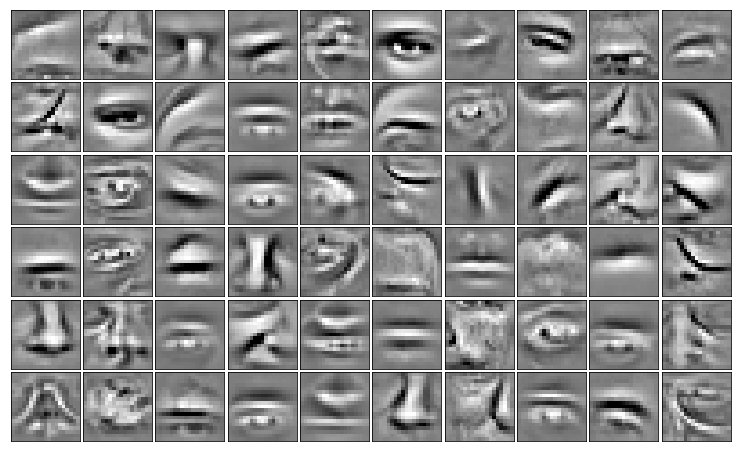

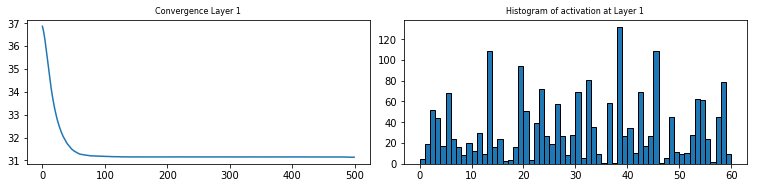

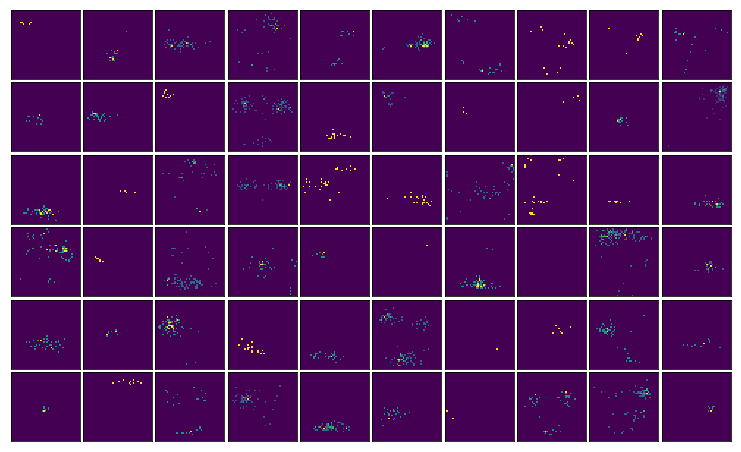

In [22]:
fname = 'cache_dir/CHAMP_high_None.pkl'
try:
    L1_mask = LoadNetwork(loading_path=fname)
except:

    nb_dico = 60
    width = 19
    dico_size = (width, width)
    l0 = 5
    mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')
    # Learning Parameters
    eta_homeo = 0.0
    eta = .05
    nb_epoch = 500
    # learn
    L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                          dico_size=dico_size, mask=mask, verbose=0)
    dico_mask = L1_mask.TrainLayer(
        Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)
    SaveNetwork(Network=L1_mask, saving_path=fname)


DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)

activation [ 70. 111.  27.  23.  45.  27.  72.  28.  22.  64.  39.  60.  35.  17.
   1.  31.   6.  53.   8.  64.   3.   5.  18.  75.  26.  27.  35.   4.
  20.  70.  70.   6.  39.   4.  25.  82.  41.  32.  19.  70.   4.  38.
  28.  36.   8.  30.  25.  36.  70.  14.   9.  19.  22.  40.  13.  41.
  21.  12.  41.  19.]
Modulation [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
activation [ 66.  96.  24.  30.  49.  27.  55.  24.  21.  59.  44.  48.  40.  23.
   1.  31.   8.  46.   8.  61.   5.   3.  25.  89.  24.  20.  36.   6.
  18.  57.  66.   5.  38.  12.  24.  75.  46.  36.  19.  61.   6.  39.
  35.  39.   6.  47.  25.  39. 100.  11.   5.  21.  24.  38.  15.  39.
  16.  10.  34.  25.]
Modulation [1.   0.99 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1

activation [28. 32. 52. 24. 43. 24. 29. 45. 21. 34. 46. 23. 55. 68. 18. 49.  5. 17.
 18. 38. 59.  4. 30. 46. 43. 21. 41.  9. 14. 28. 58.  7. 26. 37. 20. 17.
 61. 23. 58. 25. 10. 55. 40. 20. 75. 52. 10. 16. 50.  9. 14. 22. 64. 59.
 63. 43.  6. 30. 47. 19.]
Modulation [0.99 0.98 1.   1.01 0.96 1.02 1.   1.   1.02 0.98 0.96 1.   0.98 0.97
 1.04 0.99 1.04 1.02 1.04 0.98 1.   1.04 1.01 0.94 1.   1.03 0.99 1.04
 1.02 0.99 0.93 1.04 1.01 1.   1.03 0.99 0.95 0.99 0.98 1.   1.03 0.98
 1.   1.02 1.01 0.95 1.03 1.02 0.94 1.04 1.03 1.02 0.99 0.97 0.97 1.
 1.04 1.02 0.99 1.02]
activation [28. 26. 52. 26. 37. 23. 27. 49. 22. 35. 40. 18. 52. 70. 21. 53.  6. 21.
 16. 42. 60.  4. 31. 44. 43. 28. 39. 12. 15. 25. 57.  8. 28. 34. 18. 17.
 62. 25. 58. 24. 11. 50. 45. 19. 84. 46.  9. 15. 46. 11. 14. 20. 58. 65.
 59. 45.  6. 32. 49. 20.]
Modulation [0.99 0.98 0.99 1.01 0.96 1.02 1.   1.   1.03 0.98 0.96 1.01 0.98 0.96
 1.04 0.99 1.05 1.02 1.04 0.98 1.   1.05 1.01 0.94 1.   1.03 0.99 1.04
 1.03 0.99 0.93 1.05

activation [20. 18. 60. 35. 37. 47. 10. 40. 35. 39. 16. 55. 31. 46. 63. 43. 15. 34.
 31. 43. 48.  5. 37. 43. 52. 40. 37. 33. 28. 33. 47. 10. 63. 22. 19. 10.
 51.  8. 42. 31. 12. 23. 57. 19. 60. 40.  9. 25. 26. 12. 11. 16. 50. 44.
 42. 55.  5. 53. 50. 14.]
Modulation [1.01 1.   0.95 1.02 0.96 1.02 1.03 0.98 1.02 0.97 0.98 0.99 0.97 0.92
 1.01 0.97 1.09 1.04 1.06 0.96 0.96 1.1  1.   0.92 0.96 1.02 0.99 1.05
 1.05 1.   0.91 1.09 0.97 1.01 1.06 1.03 0.91 1.03 0.93 1.   1.08 0.99
 0.97 1.05 0.94 0.93 1.08 1.05 0.94 1.08 1.08 1.05 0.94 0.93 0.93 0.97
 1.09 1.   0.97 1.05]
activation [21. 18. 60. 35. 38. 54. 11. 43. 34. 38. 16. 55. 29. 43. 60. 44. 16. 34.
 32. 46. 50.  5. 35. 41. 47. 37. 39. 31. 30. 33. 45. 10. 64. 23. 19. 10.
 51.  8. 43. 30. 12. 19. 60. 20. 61. 38. 10. 28. 24. 13. 10. 16. 48. 43.
 41. 51.  6. 55. 53. 14.]
Modulation [1.01 1.01 0.94 1.02 0.96 1.02 1.03 0.98 1.02 0.97 0.98 0.99 0.97 0.92
 1.   0.97 1.09 1.04 1.06 0.96 0.95 1.11 1.   0.92 0.96 1.02 0.99 1.05
 1.05 1.   0.91 1.

activation [21. 18. 30. 59. 33. 53. 20. 35. 34. 31. 13. 36. 25. 41. 62. 47. 36. 34.
 43. 49. 48. 24. 47. 28. 29. 45. 40. 38. 48. 33. 27. 18. 36. 28. 18.  6.
 30. 12. 30. 33. 20. 14. 50. 27. 38. 47. 20. 40. 30. 40. 10. 31. 35. 44.
 47. 42. 13. 55. 44. 15.]
Modulation [1.04 1.04 0.92 1.   0.95 0.96 1.08 0.96 1.02 0.97 1.03 0.96 0.98 0.9
 0.93 0.94 1.12 1.04 1.05 0.93 0.91 1.16 0.99 0.92 0.95 1.   0.97 1.05
 1.05 0.99 0.9  1.15 0.92 1.03 1.1  1.1  0.9  1.1  0.92 1.01 1.13 1.03
 0.92 1.07 0.9  0.91 1.13 1.04 0.97 1.11 1.14 1.08 0.91 0.9  0.92 0.94
 1.16 0.95 0.91 1.1 ]
activation [21. 18. 28. 58. 33. 51. 20. 33. 35. 29. 13. 37. 23. 40. 59. 45. 38. 38.
 41. 44. 48. 26. 51. 28. 32. 44. 38. 38. 50. 31. 27. 18. 36. 29. 17.  6.
 30. 13. 26. 33. 20. 15. 49. 28. 38. 47. 19. 39. 32. 49. 10. 35. 34. 43.
 47. 39. 13. 57. 45. 16.]
Modulation [1.05 1.05 0.92 0.99 0.95 0.96 1.08 0.96 1.02 0.97 1.03 0.96 0.99 0.9
 0.92 0.94 1.12 1.04 1.05 0.93 0.91 1.16 0.99 0.92 0.95 1.   0.96 1.05
 1.05 0.99 0.9  1.15

activation [ 17.  24.  22.  33.  26.  43.  69.  28.  21.  10.  13.  20.  19.  26.
  27.  26.  66.  22.  30.  35.  36. 218.  33.  29.  16.  23.  22.  42.
  42.  24.  23.  50.  25.  38.  15.  24.  17.  17.  23.  28.  40.  28.
  25.  36.  16.  22.  27.  68.  33.  68.  10.  52.  25.  36.  30.  21.
  79.  24.  23.  15.]
Modulation [1.07 1.07 0.93 0.96 0.95 0.94 1.08 0.97 1.02 0.99 1.07 0.97 1.   0.9
 0.9  0.94 1.08 1.03 1.04 0.92 0.9  1.1  0.97 0.93 0.96 0.99 0.97 1.04
 1.01 1.   0.91 1.16 0.92 1.03 1.13 1.15 0.91 1.13 0.94 1.01 1.14 1.06
 0.91 1.07 0.9  0.9  1.15 1.03 0.97 1.06 1.18 1.06 0.92 0.9  0.9  0.94
 1.18 0.92 0.91 1.13]
activation [ 17.  24.  18.  33.  24.  40.  71.  28.  20.   9.  13.  20.  18.  25.
  26.  23.  68.  23.  29.  33.  36. 228.  32.  27.  14.  23.  22.  42.
  41.  24.  23.  50.  24.  40.  15.  24.  15.  20.  24.  25.  43.  29.
  25.  36.  15.  19.  27.  69.  32.  70.  10.  56.  24.  36.  29.  20.
  90.  22.  22.  15.]
Modulation [1.07 1.07 0.93 0.96 0.95 0.94 1.08 0.9

activation [ 15.  21.  17.  23.  30.  33.  78.  23.  24.   5.  13.  23.   9.  13.
  33.  16.  68.  16.  20.  20.  21. 174.  31.  12.   3.  27.  17.  44.
  40.  20.  22.  89.  10.  50.  16.  34.  11.  21.  26.  25.  95.  20.
   9.  28.   6.  16.  29.  75.  30.  48.  10.  40.   8.  26.  26.  15.
 271.  21.  19.  15.]
Modulation [1.07 1.07 0.94 0.96 0.95 0.94 1.06 0.97 1.02 1.   1.07 0.98 1.   0.91
 0.91 0.94 1.06 1.03 1.05 0.92 0.9  1.02 0.97 0.94 0.97 0.99 0.97 1.03
 1.   1.01 0.92 1.15 0.93 1.03 1.13 1.14 0.92 1.13 0.94 1.01 1.13 1.06
 0.91 1.07 0.91 0.91 1.15 1.02 0.97 1.05 1.18 1.05 0.92 0.9  0.91 0.95
 1.11 0.93 0.91 1.14]
activation [ 14.  21.  19.  23.  29.  31.  81.  22.  23.   5.  13.  23.   8.  13.
  34.  16.  66.  16.  20.  19.  20. 167.  35.  12.   3.  31.  17.  45.
  41.  20.  22.  93.  10.  56.  16.  32.  10.  19.  25.  26.  98.  19.
   9.  27.   6.  16.  30.  69.  31.  47.  10.  40.   8.  23.  25.  15.
 277.  21.  18.  15.]
Modulation [1.07 1.07 0.94 0.96 0.95 0.94 1.06 0.

activation [ 12.  19.  17.  25.  31.  31.  87.  29.  19.   4.  13.  24.   9.  12.
  35.  16.  59.  15.  18.  21.  23.  94.  42.  12.  12.  45.  18.  45.
  44.  18.  19. 212.  12.  57.  16.  38.   6.  19.  23.  29.  79.  18.
   9.  21.   6.  15.  69.  85.  36.  45.  15.  47.   8.  16.  28.  17.
 166.  11.  13.  16.]
Modulation [1.08 1.07 0.95 0.96 0.95 0.94 1.04 0.98 1.03 1.01 1.08 0.98 1.01 0.92
 0.91 0.95 1.05 1.04 1.05 0.93 0.91 0.99 0.97 0.95 0.98 0.99 0.98 1.03
 1.   1.01 0.93 1.1  0.94 1.02 1.13 1.14 0.93 1.13 0.95 1.01 1.1  1.06
 0.93 1.07 0.93 0.92 1.14 1.   0.97 1.05 1.19 1.05 0.94 0.91 0.91 0.96
 1.03 0.93 0.92 1.14]
activation [ 12.  19.  19.  26.  33.  30.  89.  29.  19.   4.  13.  24.   9.  12.
  34.  16.  57.  15.  19.  21.  27.  87.  42.  12.  12.  43.  17.  47.
  43.  19.  19. 223.  12.  60.  16.  36.   6.  20.  23.  29.  77.  18.
   9.  19.   6.  15.  68.  85.  36.  44.  15.  48.   8.  16.  27.  18.
 159.  11.  13.  15.]
Modulation [1.08 1.07 0.95 0.96 0.95 0.94 1.04 0.

activation [ 12.  19.  21.  24.  40.  31.  68.  33.  21.   4.  13.  31.   9.  13.
  40.  17.  51.  22.  24.  23.  32.  47.  39.  13.  19.  44.  21.  51.
  48.  24.  22. 251.  16.  66.  15.  38.   8.  20.  20.  31.  65.  11.
  10.  40.   7.  12.  68.  90.  35.  45.  14.  48.   8.  22.  26.  22.
  96.  11.  14.  15.]
Modulation [1.08 1.08 0.95 0.97 0.96 0.94 1.02 0.98 1.03 1.02 1.08 0.98 1.02 0.93
 0.91 0.96 1.04 1.04 1.05 0.94 0.91 0.98 0.97 0.96 0.98 0.99 0.99 1.02
 1.   1.01 0.93 1.02 0.95 1.01 1.14 1.13 0.94 1.13 0.95 1.01 1.08 1.07
 0.93 1.07 0.94 0.93 1.12 0.99 0.97 1.04 1.19 1.04 0.95 0.92 0.92 0.96
 1.   0.94 0.93 1.14]
activation [ 13.  19.  21.  24.  41.  30.  68.  33.  21.   4.  13.  31.   9.  13.
  41.  17.  51.  22.  24.  21.  33.  48.  40.  13.  19.  43.  20.  51.
  48.  24.  22. 240.  16.  63.  15.  40.   8.  19.  20.  31.  65.  12.
  10.  47.   7.  13.  67.  91.  35.  43.  14.  48.   8.  22.  27.  24.
  97.  12.  14.  15.]
Modulation [1.08 1.08 0.95 0.97 0.96 0.95 1.02 0.

activation [ 15.  20.  23.  27.  42.  32.  61.  32.  23.   4.  13.  30.  18.  15.
  41.  17.  55.  23.  25.  29.  39.  63.  40.  10.  26.  38.  25.  53.
  57.  21.  21. 108.  16.  59.  15.  37.  15.  18.  22.  31.  63.  19.
  10. 144.   8.  20.  61.  74.  34.  49.  15.  44.  10.  23.  34.  19.
  71.  14.  14.  15.]
Modulation [1.09 1.08 0.96 0.97 0.95 0.95 1.   0.98 1.04 1.03 1.09 0.98 1.03 0.94
 0.91 0.97 1.03 1.05 1.06 0.94 0.91 0.97 0.97 0.97 0.99 0.99 0.99 1.01
 0.99 1.02 0.94 0.95 0.96 0.99 1.14 1.13 0.95 1.14 0.96 1.01 1.06 1.07
 0.95 1.03 0.95 0.94 1.1  0.96 0.97 1.03 1.19 1.03 0.96 0.92 0.92 0.97
 0.97 0.95 0.94 1.15]
activation [ 15.  21.  23.  27.  43.  32.  63.  32.  23.   4.  13.  29.  18.  15.
  40.  18.  54.  24.  25.  29.  39.  67.  41.  10.  28.  37.  27.  53.
  59.  21.  21.  97.  16.  60.  15.  39.  15.  19.  23.  31.  62.  20.
  10. 146.   9.  21.  60.  70.  34.  49.  15.  44.  10.  23.  33.  19.
  65.  15.  14.  15.]
Modulation [1.09 1.08 0.96 0.97 0.95 0.95 1.   0.

activation [ 22.  22.  25.  28.  46.  38.  51.  29.  25.   6.  14.  31.  33.  18.
  44.  18.  50.  52.  25.  34.  38.  60.  39.  39.  28.  46.  39.  55.
  53.  26.  25.  56.  18.  59.  15.  37.  24.  28.  34.  33.  41.  22.
  11. 104.  13.  27.  52.  36.  36.  46.  15.  41.  10.  22.  35.  19.
  58.  19.  15.  15.]
Modulation [1.1  1.09 0.97 0.98 0.95 0.95 0.98 0.98 1.04 1.05 1.1  0.99 1.04 0.96
 0.91 0.98 1.02 1.04 1.06 0.95 0.91 0.94 0.96 0.98 1.   0.98 0.99 0.99
 0.97 1.03 0.95 0.92 0.97 0.97 1.15 1.12 0.96 1.14 0.96 1.01 1.04 1.08
 0.97 0.96 0.97 0.95 1.08 0.95 0.97 1.02 1.2  1.02 0.98 0.93 0.93 0.98
 0.95 0.97 0.96 1.16]
activation [22. 22. 25. 28. 46. 39. 49. 29. 25.  6. 14. 32. 36. 19. 45. 18. 50. 55.
 25. 35. 38. 61. 40. 41. 28. 46. 39. 55. 52. 27. 26. 54. 18. 58. 15. 38.
 24. 28. 33. 33. 37. 23. 11. 98. 13. 28. 51. 33. 36. 48. 15. 41. 10. 23.
 35. 19. 55. 20. 15. 15.]
Modulation [1.1  1.09 0.97 0.98 0.94 0.95 0.98 0.98 1.04 1.06 1.11 0.99 1.04 0.96
 0.91 0.98 1.01 1.04 1.06 0.

activation [28. 24. 33. 33. 39. 34. 31. 33. 30. 26. 18. 39. 45. 36. 26. 21. 36. 41.
 33. 33. 36. 26. 36. 43. 28. 33. 36. 40. 36. 34. 40. 37. 35. 43. 19. 36.
 42. 46. 33. 37. 31. 34. 15. 26. 57. 34. 40. 37. 37. 37. 21. 39. 11. 32.
 37. 33. 33. 39. 37. 15.]
Modulation [1.14 1.12 0.99 0.99 0.92 0.94 0.98 0.99 1.06 1.12 1.16 0.98 1.   0.96
 0.91 1.02 0.99 1.01 1.07 0.94 0.91 0.93 0.95 0.94 1.01 0.97 0.98 0.95
 0.94 1.03 0.95 0.9  0.99 0.92 1.2  1.09 0.95 1.09 0.96 1.01 1.05 1.09
 1.03 0.9  0.95 0.96 1.04 0.95 0.96 1.   1.26 0.99 1.05 0.94 0.92 0.99
 0.93 0.99 0.99 1.22]
activation [29. 25. 33. 33. 38. 33. 30. 32. 30. 34. 18. 38. 44. 36. 27. 22. 36. 41.
 37. 34. 35. 26. 36. 42. 28. 31. 35. 39. 36. 36. 38. 34. 35. 42. 19. 36.
 42. 43. 35. 37. 29. 34. 17. 26. 56. 34. 39. 37. 36. 34. 24. 39. 11. 33.
 38. 33. 33. 39. 37. 16.]
Modulation [1.14 1.12 0.99 0.99 0.92 0.94 0.98 0.99 1.06 1.12 1.16 0.98 1.   0.96
 0.91 1.02 0.99 1.01 1.07 0.94 0.91 0.93 0.95 0.94 1.01 0.97 0.98 0.95
 0.94 1.03 0.95 0.

activation [36. 32. 34. 36. 25. 34. 19. 32. 35. 78. 23. 34. 44. 34. 24. 50. 33. 42.
 48. 28. 29. 26. 31. 35. 33. 26. 24. 25. 30. 29. 27. 30. 36. 32. 13. 34.
 40. 53. 30. 34. 27. 35. 78. 24. 23. 31. 24. 30. 38. 25. 65. 29. 11. 36.
 26. 23. 32. 35. 42. 28.]
Modulation [1.14 1.13 0.99 0.99 0.92 0.95 1.   0.99 1.06 1.04 1.19 0.97 0.97 0.96
 0.93 1.04 0.98 0.99 1.03 0.95 0.91 0.95 0.95 0.93 1.02 0.97 0.99 0.95
 0.95 1.03 0.96 0.91 0.98 0.92 1.24 1.08 0.93 1.06 0.96 1.01 1.06 1.08
 1.   0.93 0.94 0.96 1.04 0.95 0.96 1.01 1.24 0.99 1.1  0.94 0.93 1.01
 0.94 0.98 0.97 1.25]
activation [38. 33. 34. 34. 25. 34. 20. 32. 35. 77. 23. 34. 41. 34. 25. 52. 33. 41.
 50. 27. 29. 27. 32. 36. 33. 26. 24. 24. 31. 29. 27. 31. 36. 32. 13. 33.
 36. 55. 30. 34. 27. 36. 74. 25. 23. 32. 24. 30. 37. 25. 67. 29. 11. 35.
 26. 24. 32. 35. 40. 28.]
Modulation [1.14 1.13 0.99 0.99 0.92 0.95 1.   0.99 1.06 1.04 1.19 0.97 0.97 0.96
 0.93 1.04 0.98 0.99 1.03 0.95 0.91 0.95 0.95 0.93 1.02 0.97 0.99 0.96
 0.95 1.03 0.96 0.

activation [40. 38. 34. 34. 29. 33. 27. 33. 37. 39. 40. 34. 36. 34. 37. 45. 29. 39.
 40. 32. 28. 42. 32. 33. 30. 29. 20. 22. 31. 33. 32. 26. 33. 33. 21. 32.
 29. 40. 29. 32. 30. 36. 42. 32. 26. 30. 31. 44. 38. 32. 53. 29. 18. 37.
 29. 38. 30. 35. 36. 37.]
Modulation [1.11 1.12 0.99 0.99 0.94 0.95 1.03 1.   1.05 0.99 1.18 0.97 0.96 0.96
 0.94 0.98 0.99 0.97 1.01 0.97 0.93 0.95 0.95 0.93 1.03 0.99 1.02 0.98
 0.95 1.03 0.97 0.92 0.98 0.92 1.29 1.08 0.94 1.01 0.97 1.01 1.07 1.07
 0.94 0.95 0.96 0.97 1.06 0.94 0.95 1.02 1.13 1.   1.16 0.94 0.95 1.01
 0.95 0.97 0.96 1.24]
activation [41. 36. 33. 35. 30. 33. 28. 33. 36. 38. 40. 34. 35. 34. 37. 42. 29. 41.
 40. 32. 28. 43. 32. 32. 30. 29. 20. 22. 31. 33. 32. 25. 33. 32. 22. 32.
 29. 39. 30. 31. 31. 36. 42. 33. 26. 30. 31. 44. 37. 34. 52. 29. 19. 38.
 29. 38. 30. 35. 36. 38.]
Modulation [1.11 1.12 0.99 0.99 0.94 0.95 1.03 1.   1.05 0.99 1.18 0.97 0.96 0.96
 0.94 0.98 0.99 0.97 1.01 0.97 0.93 0.95 0.95 0.93 1.03 0.99 1.02 0.98
 0.95 1.03 0.97 0.

activation [ 39.  25.  36.  33.  33.  30.  36.  29.  31.  30.  38.  29.  33.  33.
  30.  29.  29.  34.  28.  31.  31.  22.  27.  28.  30.  27.  21.  28.
  33.  37.  33.  36.  25.  31.  64.  31.  24.  29.  30.  31.  33.  25.
  22.  32.  39.  30.  35.  27.  28.  32.  34.  27. 156.  27.  30.  39.
  30.  28.  34.  38.]
Modulation [1.09 1.11 0.99 0.97 0.95 0.96 1.   1.   1.01 0.98 1.15 0.97 0.97 0.96
 0.93 0.97 1.01 0.96 1.   0.97 0.95 0.93 0.97 0.94 1.04 1.   1.08 1.03
 0.96 1.01 0.97 0.95 0.98 0.93 1.3  1.08 0.96 1.   0.98 1.02 1.08 1.06
 0.93 0.95 0.97 0.98 1.06 0.93 0.94 1.01 1.08 1.02 1.15 0.92 0.96 0.99
 0.97 0.97 0.94 1.2 ]
activation [ 38.  25.  36.  33.  32.  31.  34.  30.  27.  30.  38.  29.  32.  33.
  29.  31.  28.  34.  27.  32.  31.  22.  27.  27.  29.  27.  21.  29.
  32.  35.  33.  35.  25.  31.  68.  30.  25.  29.  30.  30.  33.  24.
  21.  30.  38.  31.  36.  26.  27.  32.  34.  26. 175.  25.  31.  39.
  28.  28.  33.  38.]
Modulation [1.09 1.11 0.99 0.97 0.95 0.96 1.   1.

activation [ 34.  23.  34.  33.  30.  30.  51.  32.  18.  32.  40.  31.  12.  19.
  23.  18.  30.  24.  27.  36.  29.  18.  24.  24.  30.  21.  21.  29.
  33.  37.  24.  35.  29.  34. 145.  26.  29.  43.  33.  28.  33.  22.
  14.  26.  35.  32.  30.  10.  26.  31.  34.  25. 210.  27.  31.  40.
  25.  25.  29.  26.]
Modulation [1.08 1.11 0.98 0.97 0.96 0.96 1.   1.   1.02 0.98 1.15 0.97 0.97 0.96
 0.93 0.97 1.01 0.96 1.   0.97 0.95 0.94 0.97 0.94 1.04 1.01 1.08 1.03
 0.96 1.01 0.97 0.95 0.99 0.93 1.26 1.08 0.97 1.   0.98 1.02 1.07 1.06
 0.93 0.95 0.97 0.98 1.06 0.94 0.95 1.01 1.08 1.02 1.06 0.93 0.96 0.99
 0.97 0.98 0.95 1.2 ]
activation [ 35.  23.  34.  33.  30.  29.  54.  33.  18.  32.  39.  31.  10.  18.
  23.  20.  30.  23.  27.  36.  29.  18.  24.  24.  30.  21.  21.  29.
  33.  37.  24.  35.  29.  35. 154.  28.  30.  42.  33.  28.  34.  22.
  17.  26.  35.  32.  30.   8.  26.  31.  34.  26. 191.  30.  32.  39.
  25.  25.  29.  26.]
Modulation [1.08 1.11 0.98 0.97 0.96 0.96 1.   1.

activation [ 39.  21.  27.  34.  33.  28.  62.  39.  34.  36.  39.  30.  17.  19.
  17.  24.  32.  20.  29.  38.  30.  17.  29.  29.  36.  21.  23.  31.
  34.  37.  24.  25.  30.  32. 204.  27.  32.  57.  29.  29.  34.  22.
  12.  24.  36.  31.  24.   7.  28.  34.  34.  31.  95.  28.  30.  34.
  27.  23.  26.  26.]
Modulation [1.08 1.11 0.99 0.98 0.96 0.96 0.99 1.   1.02 0.98 1.14 0.97 0.98 0.97
 0.94 0.98 1.01 0.97 1.   0.97 0.95 0.95 0.97 0.95 1.04 1.01 1.09 1.03
 0.96 1.01 0.98 0.96 0.99 0.93 1.17 1.08 0.97 1.   0.98 1.02 1.07 1.07
 0.94 0.96 0.97 0.98 1.06 0.95 0.95 1.01 1.07 1.02 1.01 0.93 0.96 0.99
 0.97 0.98 0.95 1.19]
activation [ 41.  21.  27.  34.  32.  28.  62.  38.  34.  34.  39.  30.  17.  19.
  16.  25.  32.  20.  29.  39.  30.  16.  29.  29.  36.  22.  24.  31.
  34.  37.  24.  23.  30.  34. 207.  27.  31.  58.  29.  29.  34.  22.
  10.  26.  37.  31.  22.   7.  28.  34.  34.  31.  92.  27.  31.  35.
  27.  23.  26.  26.]
Modulation [1.08 1.11 0.99 0.98 0.96 0.96 0.99 1.

activation [ 41.  20.  32.  34.  32.  31.  61.  34.  41.  30.  40.  32.  20.  18.
  18.  27.  32.  24.  30.  44.  30.  22.  28.  29.  38.  21.  26.  34.
  32.  41.  24.  24.  31.  34. 181.  27.  37.  52.  28.  29.  39.  28.
   9.  28.  36.  31.  20.   7.  29.  34.  32.  29.  75.  36.  33.  34.
  26.  19.  20.  26.]
Modulation [1.07 1.12 0.99 0.98 0.96 0.96 0.98 1.   1.02 0.98 1.13 0.97 0.99 0.97
 0.95 0.98 1.01 0.97 1.   0.97 0.96 0.95 0.98 0.95 1.04 1.02 1.09 1.03
 0.96 1.01 0.98 0.96 0.99 0.93 1.08 1.08 0.97 0.99 0.98 1.02 1.07 1.07
 0.95 0.96 0.97 0.98 1.06 0.96 0.95 1.01 1.07 1.03 0.98 0.94 0.96 0.99
 0.98 0.99 0.96 1.19]
activation [ 42.  20.  32.  34.  33.  31.  59.  35.  43.  30.  40.  33.  20.  18.
  17.  27.  32.  23.  30.  45.  30.  22.  28.  29.  37.  22.  26.  34.
  31.  47.  25.  24.  32.  34. 173.  26.  37.  49.  28.  29.  39.  28.
   9.  28.  38.  31.  20.   7.  29.  35.  32.  29.  73.  36.  33.  34.
  26.  20.  20.  26.]
Modulation [1.07 1.12 0.99 0.98 0.96 0.96 0.98 1.

activation [40. 21. 33. 37. 30. 32. 49. 33. 62. 27. 38. 31. 22. 18. 16. 34. 35. 26.
 31. 40. 31. 30. 22. 28. 38. 34. 29. 33. 32. 40. 30. 37. 35. 34. 84. 28.
 39. 40. 32. 31. 44. 26. 12. 40. 43. 34. 27. 22. 31. 35. 34. 27. 51. 34.
 35. 35. 33. 28. 21. 26.]
Modulation [1.06 1.12 0.99 0.97 0.96 0.97 0.96 1.   1.   0.99 1.12 0.97 1.   0.99
 0.96 0.99 1.01 0.98 1.   0.96 0.96 0.96 0.98 0.96 1.03 1.02 1.09 1.03
 0.97 1.   0.99 0.97 0.99 0.94 0.99 1.09 0.97 0.98 0.99 1.03 1.06 1.07
 0.97 0.96 0.97 0.99 1.07 0.98 0.96 1.01 1.07 1.03 0.97 0.94 0.96 0.99
 0.98 0.99 0.97 1.19]
activation [40. 21. 33. 37. 30. 32. 48. 33. 62. 27. 37. 31. 22. 19. 16. 36. 35. 27.
 31. 39. 31. 29. 22. 28. 38. 34. 30. 33. 32. 40. 30. 37. 35. 34. 77. 29.
 39. 39. 32. 31. 44. 26. 12. 41. 44. 34. 28. 24. 31. 35. 34. 27. 50. 34.
 35. 35. 33. 30. 21. 26.]
Modulation [1.06 1.12 0.99 0.97 0.96 0.97 0.96 1.   1.   0.99 1.12 0.97 1.   0.99
 0.97 0.99 1.01 0.98 1.   0.96 0.96 0.96 0.98 0.96 1.03 1.02 1.09 1.03
 0.97 1.   0.99 0.

activation [37. 22. 36. 29. 30. 31. 35. 33. 34. 34. 37. 33. 33. 35. 46. 32. 32. 35.
 34. 39. 34. 35. 31. 33. 35. 29. 32. 35. 31. 39. 32. 34. 33. 34. 28. 32.
 37. 40. 30. 36. 36. 27. 39. 33. 35. 34. 40. 31. 29. 34. 34. 29. 42. 27.
 34. 33. 34. 27. 29. 26.]
Modulation [1.04 1.18 0.99 0.96 0.98 0.97 0.93 1.   0.97 1.   1.1  0.99 1.02 1.04
 0.97 0.99 1.01 0.98 1.01 0.94 0.97 0.98 1.02 0.97 1.01 1.03 1.1  1.03
 0.97 0.98 0.99 0.95 0.99 0.94 0.96 1.1  0.95 0.97 1.   1.03 1.02 1.1
 0.99 0.95 0.95 0.98 1.02 0.94 0.97 1.   1.07 1.05 0.95 0.95 0.96 0.98
 0.98 1.01 1.01 1.22]
activation [36. 23. 36. 25. 30. 31. 34. 33. 33. 34. 36. 33. 33. 47. 45. 31. 32. 36.
 34. 39. 34. 35. 31. 33. 35. 29. 32. 35. 30. 39. 31. 33. 33. 33. 30. 32.
 36. 42. 30. 36. 36. 27. 38. 33. 34. 33. 40. 31. 29. 34. 34. 29. 41. 27.
 34. 33. 32. 28. 30. 27.]
Modulation [1.03 1.18 0.98 0.96 0.98 0.97 0.93 1.   0.97 1.   1.1  0.99 1.02 1.04
 0.97 0.99 1.01 0.98 1.01 0.94 0.97 0.98 1.02 0.97 1.01 1.03 1.1  1.03
 0.98 0.98 0.99 0.9

activation [35. 31. 34. 25. 33. 33. 29. 33. 31. 35. 32. 34. 37. 48. 34. 30. 33. 44.
 33. 36. 34. 36. 36. 34. 31. 30. 34. 35. 30. 33. 38. 35. 33. 33. 31. 32.
 36. 31. 32. 35. 31. 29. 34. 33. 33. 33. 27. 33. 29. 37. 34. 31. 35. 35.
 34. 32. 33. 37. 33. 28.]
Modulation [1.03 1.22 0.98 1.   0.99 0.98 0.95 1.   0.97 1.   1.08 0.99 1.01 0.96
 0.94 1.   1.01 0.94 1.   0.93 0.97 0.97 1.01 0.97 1.02 1.05 1.1  1.02
 0.99 0.97 0.99 0.95 0.99 0.94 0.98 1.1  0.94 0.97 1.01 1.01 1.02 1.12
 0.97 0.95 0.95 0.99 1.01 0.95 0.99 0.99 1.06 1.07 0.93 0.97 0.96 0.99
 0.99 1.01 1.02 1.24]
activation [35. 36. 34. 25. 33. 33. 29. 33. 31. 35. 32. 33. 37. 44. 32. 32. 33. 41.
 32. 35. 34. 36. 35. 33. 31. 30. 34. 35. 30. 33. 37. 35. 33. 33. 32. 31.
 36. 33. 34. 35. 31. 29. 34. 33. 33. 33. 27. 33. 29. 37. 34. 32. 36. 36.
 34. 32. 33. 38. 33. 28.]
Modulation [1.03 1.22 0.98 1.01 0.99 0.98 0.95 1.   0.97 1.   1.08 0.99 1.01 0.95
 0.94 1.   1.01 0.94 1.   0.93 0.97 0.97 1.01 0.97 1.02 1.05 1.1  1.02
 0.99 0.97 0.99 0.

activation [33. 45. 32. 43. 32. 34. 32. 31. 40. 32. 31. 28. 32. 20. 33. 34. 34. 32.
 31. 32. 34. 34. 35. 36. 32. 34. 37. 34. 34. 31. 31. 33. 34. 35. 34. 32.
 30. 31. 34. 30. 33. 30. 32. 32. 32. 37. 35. 31. 35. 36. 34. 34. 23. 35.
 34. 34. 36. 37. 35. 39.]
Modulation [1.03 1.12 0.97 1.   0.99 0.98 0.97 1.01 0.96 1.   1.09 1.01 1.   0.98
 0.94 1.   1.01 0.94 1.01 0.93 0.96 0.96 1.   0.97 1.03 1.05 1.08 1.01
 1.   0.98 0.99 0.95 0.99 0.94 0.98 1.12 0.94 0.96 1.   1.01 1.02 1.15
 0.98 0.96 0.96 0.98 1.05 0.95 1.   0.97 1.05 1.07 0.96 0.96 0.96 0.99
 0.99 0.99 1.01 1.27]
activation [33. 43. 32. 43. 32. 34. 32. 31. 40. 32. 31. 28. 32. 20. 33. 34. 34. 32.
 31. 32. 34. 32. 35. 36. 31. 35. 37. 34. 34. 31. 31. 33. 34. 35. 31. 33.
 30. 31. 34. 29. 34. 31. 32. 32. 31. 37. 40. 31. 35. 36. 34. 34. 23. 34.
 34. 34. 36. 37. 35. 41.]
Modulation [1.03 1.11 0.97 0.99 0.99 0.98 0.97 1.01 0.95 1.   1.1  1.01 1.   0.99
 0.94 1.   1.01 0.94 1.02 0.93 0.96 0.96 1.   0.97 1.03 1.05 1.07 1.01
 1.   0.98 0.99 0.

activation [34. 30. 29. 25. 34. 33. 34. 34. 37. 33. 32. 35. 32. 36. 31. 35. 29. 33.
 37. 35. 33. 32. 32. 33. 34. 38. 35. 29. 36. 31. 33. 32. 36. 34. 35. 34.
 31. 31. 32. 29. 33. 33. 34. 34. 33. 32. 38. 34. 37. 35. 34. 33. 28. 33.
 33. 34. 36. 33. 34. 41.]
Modulation [1.02 1.11 0.99 0.99 1.   0.98 0.96 1.02 0.98 1.   1.11 1.   1.01 1.03
 0.96 0.99 1.04 0.95 1.01 0.94 0.96 0.97 0.99 0.96 1.03 1.03 1.06 1.02
 0.98 1.   1.   0.95 0.98 0.93 0.99 1.12 0.96 0.97 1.   1.05 1.02 1.16
 0.99 0.96 0.98 0.97 0.98 0.96 0.97 0.96 1.05 1.06 0.96 0.96 0.95 0.98
 0.96 0.97 1.01 1.16]
activation [34. 30. 29. 25. 34. 33. 33. 34. 38. 33. 32. 34. 32. 36. 31. 35. 31. 33.
 36. 36. 33. 34. 32. 33. 34. 37. 35. 30. 36. 31. 35. 32. 36. 34. 35. 34.
 32. 31. 32. 29. 33. 33. 35. 34. 33. 32. 37. 34. 36. 35. 34. 33. 28. 33.
 32. 34. 35. 32. 34. 39.]
Modulation [1.02 1.12 0.99 1.   0.99 0.98 0.96 1.02 0.97 1.   1.11 1.   1.01 1.03
 0.96 0.99 1.05 0.95 1.01 0.93 0.96 0.97 0.99 0.96 1.02 1.03 1.06 1.02
 0.98 1.01 1.   0.

activation [33. 32. 34. 43. 34. 32. 32. 34. 33. 34. 34. 34. 35. 31. 33. 30. 33. 35.
 30. 34. 35. 34. 32. 31. 31. 30. 34. 36. 34. 34. 31. 32. 32. 34. 34. 34.
 34. 34. 34. 33. 34. 34. 35. 35. 33. 33. 31. 34. 31. 34. 34. 36. 32. 33.
 34. 33. 32. 32. 35. 32.]
Modulation [1.04 1.15 1.   1.02 0.99 0.99 0.97 1.   0.97 0.98 1.11 1.03 1.03 1.01
 0.98 1.   1.02 0.96 1.   0.91 0.95 0.95 1.03 0.97 1.04 1.03 1.02 1.03
 0.96 1.   1.01 0.97 0.96 0.92 0.98 1.09 0.96 0.99 1.   1.07 1.03 1.11
 0.97 0.94 0.97 0.99 0.99 0.96 0.99 0.94 1.03 1.06 0.96 0.97 0.96 0.99
 0.97 1.   0.99 1.13]
activation [33. 32. 34. 43. 34. 32. 32. 34. 33. 33. 34. 34. 35. 31. 33. 30. 32. 35.
 30. 34. 35. 34. 32. 32. 31. 30. 34. 36. 34. 34. 31. 32. 32. 34. 34. 34.
 34. 34. 34. 33. 34. 34. 34. 34. 33. 33. 31. 34. 32. 34. 34. 36. 32. 33.
 34. 34. 32. 33. 35. 32.]
Modulation [1.04 1.15 1.   1.02 0.99 0.99 0.97 1.   0.97 0.98 1.11 1.03 1.03 1.01
 0.98 1.   1.02 0.96 1.   0.91 0.95 0.95 1.03 0.97 1.04 1.04 1.02 1.03
 0.96 1.   1.01 0.

activation [33. 33. 33. 31. 35. 33. 35. 34. 33. 33. 34. 34. 32. 33. 33. 36. 36. 31.
 36. 34. 34. 29. 34. 34. 33. 43. 33. 30. 32. 34. 35. 33. 33. 33. 32. 34.
 34. 34. 32. 34. 32. 32. 33. 32. 32. 33. 34. 34. 33. 33. 31. 34. 33. 33.
 33. 35. 34. 33. 32. 32.]
Modulation [1.04 1.15 1.   1.   0.98 1.   0.96 0.99 0.98 1.   1.1  1.   1.01 1.01
 0.98 1.   1.05 0.96 1.01 0.92 0.93 0.98 1.03 0.98 1.04 1.03 1.02 1.02
 0.96 1.   1.   0.97 0.98 0.92 0.97 1.09 0.95 0.98 1.   1.07 1.03 1.14
 0.97 0.97 0.99 0.99 0.99 0.96 0.99 0.95 1.04 1.02 0.97 0.97 0.95 0.96
 0.99 1.01 0.98 1.15]
activation [33. 33. 33. 31. 35. 33. 34. 33. 34. 33. 34. 34. 32. 33. 33. 36. 36. 32.
 36. 34. 34. 29. 34. 34. 33. 41. 33. 30. 32. 34. 35. 33. 33. 33. 32. 34.
 34. 34. 33. 34. 32. 33. 33. 32. 32. 33. 34. 35. 33. 33. 31. 33. 33. 33.
 33. 35. 34. 33. 32. 32.]
Modulation [1.04 1.15 1.   1.01 0.98 1.   0.96 0.99 0.98 1.   1.09 1.   1.01 1.01
 0.98 1.   1.04 0.96 1.   0.92 0.93 0.98 1.03 0.98 1.04 1.02 1.02 1.02
 0.97 0.99 1.   0.

activation [34. 33. 34. 34. 34. 33. 33. 33. 33. 35. 33. 34. 35. 34. 32. 31. 31. 33.
 32. 33. 33. 33. 35. 34. 35. 33. 33. 35. 32. 33. 30. 33. 35. 33. 34. 33.
 33. 32. 33. 34. 36. 34. 33. 34. 35. 33. 33. 31. 33. 34. 34. 33. 30. 35.
 32. 32. 35. 36. 34. 33.]
Modulation [1.03 1.14 1.   1.02 1.   1.01 0.99 1.02 0.96 0.99 1.09 1.   1.04 1.02
 0.96 0.97 1.03 0.95 0.99 0.93 0.93 0.98 1.02 0.96 1.03 1.02 1.06 1.03
 1.   0.98 1.   0.97 0.97 0.93 0.95 1.1  0.95 0.97 1.   1.05 1.   1.13
 0.98 0.95 0.96 1.   0.99 0.96 0.98 0.94 1.04 1.04 0.97 0.97 0.97 0.96
 0.95 1.   1.02 1.17]
activation [34. 33. 35. 34. 34. 33. 32. 33. 30. 34. 33. 34. 35. 34. 32. 30. 31. 32.
 32. 34. 33. 33. 35. 34. 35. 33. 35. 34. 33. 32. 31. 33. 35. 33. 34. 33.
 32. 32. 34. 34. 35. 34. 33. 35. 33. 33. 33. 32. 33. 33. 34. 33. 34. 35.
 35. 32. 34. 36. 34. 32.]
Modulation [1.03 1.14 1.   1.02 0.99 1.01 0.99 1.02 0.96 0.99 1.09 1.   1.03 1.02
 0.96 0.98 1.04 0.95 1.   0.93 0.93 0.98 1.02 0.96 1.03 1.02 1.07 1.03
 1.01 0.98 1.01 0.

activation [33. 34. 32. 34. 33. 33. 34. 34. 32. 33. 34. 34. 33. 33. 34. 33. 34. 33.
 33. 33. 32. 35. 32. 33. 32. 34. 33. 32. 34. 34. 34. 33. 33. 34. 33. 34.
 34. 33. 31. 33. 32. 33. 34. 33. 33. 33. 35. 34. 33. 33. 34. 33. 35. 33.
 33. 33. 35. 34. 34. 34.]
Modulation [1.03 1.11 1.   1.02 0.97 0.99 0.98 1.03 0.97 0.98 1.09 1.01 1.03 1.01
 0.96 1.03 1.02 0.96 1.02 0.92 0.95 0.96 1.02 0.96 1.04 1.05 1.01 1.04
 0.99 0.99 0.97 0.96 0.99 0.93 0.95 1.09 0.96 0.98 0.99 1.08 1.01 1.12
 0.97 0.95 0.97 0.99 0.97 0.96 0.99 0.97 1.02 1.05 0.98 0.96 0.95 0.99
 0.99 0.97 1.   1.19]
activation [33. 34. 32. 34. 33. 32. 34. 34. 33. 31. 34. 34. 34. 33. 34. 35. 34. 33.
 34. 33. 32. 33. 32. 33. 32. 36. 31. 33. 35. 34. 33. 33. 34. 34. 33. 34.
 34. 34. 31. 34. 32. 33. 34. 33. 33. 33. 34. 33. 33. 33. 33. 33. 34. 33.
 33. 33. 35. 34. 34. 34.]
Modulation [1.03 1.1  1.01 1.02 0.97 0.99 0.98 1.03 0.98 0.98 1.08 1.01 1.03 1.02
 0.96 1.03 1.02 0.96 1.02 0.92 0.95 0.95 1.03 0.96 1.05 1.05 1.01 1.04
 0.99 0.99 0.97 0.

activation [33. 31. 35. 33. 34. 33. 33. 33. 33. 34. 34. 33. 35. 34. 33. 34. 32. 32.
 33. 33. 35. 33. 34. 33. 34. 33. 36. 35. 33. 34. 32. 32. 33. 33. 32. 33.
 33. 31. 36. 36. 34. 33. 34. 34. 34. 34. 31. 34. 33. 32. 33. 33. 34. 33.
 34. 34. 33. 32. 34. 31.]
Modulation [1.04 1.13 1.   1.   0.97 1.02 0.98 1.04 0.98 1.01 1.06 1.01 1.03 1.02
 0.94 0.97 1.04 0.97 0.99 0.94 0.94 0.96 1.02 0.97 1.04 1.02 1.09 1.04
 0.96 1.01 1.01 0.96 0.98 0.92 0.98 1.08 0.95 0.98 0.99 1.04 1.01 1.13
 0.96 0.95 0.96 0.99 0.98 0.96 1.   0.95 1.03 1.06 0.97 0.96 0.96 1.01
 0.97 0.99 0.98 1.17]
activation [33. 31. 35. 33. 34. 34. 33. 33. 33. 34. 34. 33. 34. 35. 32. 33. 32. 33.
 33. 33. 35. 33. 34. 33. 34. 33. 36. 35. 33. 34. 32. 32. 33. 33. 33. 33.
 33. 32. 36. 36. 34. 33. 34. 34. 34. 34. 31. 33. 33. 32. 33. 33. 33. 33.
 34. 34. 33. 32. 34. 31.]
Modulation [1.04 1.14 1.   1.   0.97 1.02 0.98 1.04 0.98 1.   1.06 1.01 1.02 1.02
 0.94 0.97 1.04 0.97 0.99 0.94 0.94 0.96 1.02 0.97 1.04 1.02 1.08 1.03
 0.96 1.01 1.01 0.

activation [34. 34. 33. 37. 34. 34. 33. 34. 32. 33. 33. 33. 34. 30. 33. 33. 32. 35.
 34. 33. 30. 33. 33. 35. 35. 33. 32. 32. 33. 33. 34. 32. 34. 34. 34. 34.
 33. 35. 33. 30. 34. 32. 30. 32. 32. 34. 35. 34. 34. 36. 33. 33. 35. 33.
 34. 34. 32. 34. 33. 36.]
Modulation [1.04 1.11 1.   1.02 0.97 0.99 0.97 1.   0.97 0.99 1.06 1.02 1.02 1.01
 0.99 0.98 1.03 0.97 1.01 0.93 0.95 0.96 1.02 0.98 1.07 1.03 1.03 1.02
 0.97 1.   1.   0.96 0.99 0.92 0.98 1.09 0.96 0.98 1.   1.04 0.99 1.14
 0.97 0.96 0.97 0.98 0.99 0.96 1.   0.97 1.04 1.07 0.97 0.97 0.96 0.98
 0.96 1.   0.98 1.19]
activation [34. 34. 33. 37. 34. 33. 33. 34. 32. 33. 33. 33. 34. 30. 33. 33. 32. 34.
 34. 33. 30. 33. 33. 35. 36. 33. 32. 33. 33. 33. 34. 32. 34. 34. 34. 34.
 33. 35. 34. 30. 34. 32. 30. 32. 32. 34. 35. 34. 34. 36. 33. 33. 34. 33.
 34. 34. 32. 34. 33. 36.]
Modulation [1.04 1.11 1.   1.02 0.97 0.99 0.97 1.   0.97 0.99 1.06 1.02 1.02 1.02
 0.99 0.98 1.04 0.96 1.01 0.93 0.95 0.96 1.02 0.97 1.07 1.03 1.03 1.02
 0.97 1.   1.   0.

activation [34. 32. 33. 32. 33. 33. 34. 33. 33. 34. 33. 34. 34. 34. 35. 33. 33. 34.
 33. 34. 33. 33. 34. 32. 32. 34. 33. 34. 33. 34. 32. 33. 34. 33. 32. 33.
 34. 32. 34. 35. 33. 34. 35. 32. 37. 33. 32. 33. 33. 34. 33. 33. 34. 33.
 33. 34. 33. 34. 33. 32.]
Modulation [1.02 1.13 1.01 1.02 0.98 1.   0.97 0.99 0.97 0.98 1.06 1.01 1.   1.03
 0.97 0.98 1.05 0.96 0.99 0.94 0.94 0.97 1.   0.98 1.04 1.03 1.05 1.04
 0.98 0.99 1.01 0.97 0.97 0.9  0.99 1.09 0.96 0.99 0.99 1.06 1.02 1.14
 1.   0.95 0.97 0.99 0.98 0.96 1.   0.93 1.05 1.07 0.97 0.98 0.95 0.96
 0.98 0.98 1.01 1.17]
activation [34. 32. 33. 32. 33. 33. 34. 33. 33. 34. 33. 34. 34. 34. 35. 33. 33. 34.
 33. 34. 32. 33. 34. 32. 32. 34. 33. 34. 33. 32. 32. 33. 34. 33. 32. 33.
 34. 34. 34. 35. 34. 34. 35. 32. 37. 33. 32. 33. 33. 34. 33. 33. 34. 33.
 33. 34. 33. 34. 33. 32.]
Modulation [1.02 1.13 1.01 1.03 0.98 1.   0.97 0.99 0.97 0.98 1.06 1.01 1.   1.03
 0.96 0.98 1.05 0.96 0.99 0.94 0.94 0.98 1.   0.98 1.04 1.03 1.05 1.04
 0.98 0.99 1.01 0.

activation [32. 34. 34. 35. 34. 35. 34. 33. 32. 33. 32. 35. 34. 34. 33. 33. 30. 35.
 33. 33. 33. 33. 32. 34. 38. 33. 34. 33. 34. 33. 34. 34. 32. 34. 35. 33.
 32. 33. 33. 31. 33. 32. 33. 34. 33. 33. 33. 33. 34. 33. 34. 34. 32. 34.
 33. 30. 33. 33. 35. 35.]
Modulation [1.02 1.16 1.01 1.01 0.96 0.99 0.98 1.   0.97 0.99 1.07 1.02 0.99 1.01
 0.97 0.99 1.02 0.96 1.   0.93 0.97 0.96 1.03 0.99 1.06 1.05 1.03 1.01
 0.99 0.98 1.01 0.97 1.   0.91 0.96 1.1  0.95 0.97 1.01 1.03 1.   1.14
 0.99 0.95 0.96 1.   1.   0.95 0.97 0.93 1.05 1.07 0.95 0.99 0.96 0.98
 0.98 0.98 0.99 1.19]
activation [32. 34. 34. 35. 34. 35. 34. 33. 32. 33. 32. 35. 34. 34. 33. 33. 30. 34.
 33. 33. 33. 33. 32. 34. 38. 33. 34. 33. 34. 32. 34. 34. 32. 34. 35. 33.
 32. 35. 33. 31. 33. 32. 35. 33. 32. 33. 33. 33. 34. 33. 34. 34. 32. 34.
 33. 30. 33. 33. 35. 35.]
Modulation [1.03 1.16 1.01 1.01 0.96 0.99 0.98 1.   0.97 0.99 1.08 1.02 0.99 1.01
 0.97 0.99 1.02 0.96 1.   0.93 0.97 0.97 1.03 0.99 1.05 1.05 1.03 1.01
 0.99 0.98 1.01 0.

activation [35. 32. 31. 32. 33. 33. 34. 33. 35. 33. 34. 35. 36. 35. 31. 33. 31. 33.
 33. 32. 32. 33. 35. 33. 34. 36. 31. 33. 33. 36. 32. 35. 33. 34. 34. 33.
 34. 34. 31. 35. 36. 32. 34. 34. 34. 33. 36. 31. 34. 32. 34. 34. 33. 34.
 33. 32. 33. 34. 32. 30.]
Modulation [1.04 1.13 1.   1.01 0.98 0.98 0.96 1.01 0.97 1.   1.09 0.99 1.01 0.99
 0.97 0.97 1.03 0.95 1.01 0.91 0.96 0.99 1.01 0.96 1.07 1.03 1.04 1.04
 0.98 0.99 1.01 0.98 1.   0.92 0.95 1.09 0.97 0.98 0.98 1.1  1.03 1.13
 0.96 0.94 0.95 1.   1.   0.97 0.98 0.96 1.03 1.04 0.96 0.97 0.95 0.98
 0.99 0.98 0.99 1.16]
activation [35. 32. 32. 32. 33. 34. 32. 33. 35. 33. 34. 35. 34. 35. 32. 33. 31. 33.
 33. 32. 32. 33. 35. 33. 34. 36. 31. 33. 33. 34. 32. 35. 33. 34. 33. 33.
 34. 35. 32. 35. 36. 32. 34. 34. 34. 33. 36. 33. 34. 32. 34. 34. 33. 34.
 33. 32. 33. 34. 32. 30.]
Modulation [1.03 1.14 1.01 1.02 0.98 0.98 0.96 1.01 0.97 1.   1.09 0.99 1.   0.98
 0.98 0.97 1.03 0.95 1.01 0.91 0.96 0.99 1.01 0.96 1.07 1.02 1.05 1.04
 0.99 0.99 1.02 0.

activation [33. 33. 36. 33. 34. 32. 32. 35. 33. 34. 34. 34. 34. 33. 33. 33. 31. 33.
 33. 34. 32. 34. 32. 33. 34. 32. 32. 33. 35. 34. 33. 33. 34. 34. 33. 33.
 34. 33. 33. 34. 32. 36. 33. 34. 34. 35. 32. 33. 33. 34. 33. 33. 34. 32.
 34. 32. 34. 34. 33. 33.]
Modulation [1.02 1.15 1.01 1.01 0.98 0.98 0.96 1.01 0.96 0.99 1.07 1.03 0.99 1.01
 0.94 1.   1.02 0.97 1.03 0.93 0.98 0.96 1.01 0.98 1.03 1.03 1.06 1.02
 0.98 1.01 1.   0.96 0.98 0.91 0.97 1.1  0.95 0.98 1.   1.07 1.01 1.12
 0.95 0.97 0.97 0.98 0.97 0.96 0.98 0.99 1.03 1.05 0.96 0.97 0.97 1.
 0.99 0.97 1.01 1.22]
activation [33. 33. 36. 33. 34. 33. 32. 34. 34. 34. 34. 34. 34. 34. 32. 34. 31. 33.
 33. 34. 33. 34. 32. 33. 34. 32. 32. 33. 35. 34. 33. 34. 33. 33. 33. 33.
 34. 33. 33. 34. 32. 36. 33. 34. 34. 34. 32. 33. 33. 34. 33. 33. 33. 32.
 34. 32. 34. 34. 33. 33.]
Modulation [1.02 1.15 1.   1.01 0.98 0.99 0.97 1.   0.96 0.99 1.07 1.02 0.99 1.02
 0.94 1.   1.02 0.97 1.03 0.93 0.98 0.96 1.01 0.98 1.02 1.03 1.06 1.02
 0.98 1.   1.   0.96

activation [34. 34. 32. 33. 33. 33. 35. 32. 32. 33. 34. 34. 35. 34. 33. 33. 32. 33.
 34. 34. 31. 33. 34. 34. 34. 33. 34. 33. 34. 32. 33. 34. 33. 33. 33. 33.
 34. 32. 33. 34. 35. 33. 33. 34. 33. 33. 35. 34. 35. 34. 33. 33. 33. 36.
 33. 32. 32. 32. 33. 33.]
Modulation [1.02 1.11 1.   1.02 0.99 1.   0.98 1.02 0.99 1.01 1.05 1.01 1.01 0.98
 0.98 0.98 1.02 0.97 1.01 0.93 0.95 0.96 1.01 0.97 1.04 1.04 1.1  1.05
 0.95 1.   1.01 0.95 0.98 0.92 0.98 1.11 0.96 0.98 0.99 1.08 1.04 1.13
 0.97 0.95 0.94 0.98 1.   0.96 0.97 0.97 1.03 1.02 0.98 1.   0.97 0.98
 0.96 0.97 0.99 1.2 ]
activation [34. 34. 32. 33. 33. 33. 35. 32. 34. 32. 33. 34. 35. 34. 34. 33. 32. 33.
 34. 34. 31. 33. 34. 34. 34. 33. 35. 33. 34. 32. 33. 34. 33. 33. 33. 33.
 34. 32. 33. 34. 35. 33. 32. 34. 33. 33. 35. 34. 35. 33. 33. 33. 33. 36.
 33. 32. 32. 32. 33. 33.]
Modulation [1.01 1.11 1.   1.02 0.99 1.   0.98 1.03 0.99 1.01 1.04 1.01 1.01 0.98
 0.98 0.98 1.02 0.97 1.01 0.93 0.96 0.96 1.01 0.97 1.04 1.04 1.09 1.05
 0.95 1.   1.01 0.

activation [33. 32. 34. 34. 33. 34. 33. 34. 34. 33. 32. 32. 33. 34. 33. 34. 33. 33.
 34. 33. 33. 33. 34. 33. 33. 33. 32. 34. 32. 34. 34. 33. 33. 33. 34. 34.
 32. 34. 34. 34. 33. 32. 33. 33. 33. 33. 33. 34. 34. 34. 33. 33. 35. 33.
 34. 35. 33. 34. 33. 34.]
Modulation [1.   1.1  1.01 1.02 1.   0.98 0.94 1.02 0.98 1.01 1.07 1.   1.   0.98
 0.95 1.01 1.02 0.98 0.99 0.95 1.   0.96 1.02 0.96 1.04 1.05 1.06 1.04
 0.96 0.98 1.   0.96 0.99 0.93 0.98 1.09 0.95 0.97 1.   1.05 1.04 1.12
 0.98 0.95 0.95 0.99 0.97 0.97 0.97 0.98 1.04 1.03 0.97 0.96 0.97 0.99
 1.   1.   0.99 1.18]
activation [33. 32. 34. 34. 33. 34. 33. 34. 35. 33. 32. 32. 33. 33. 33. 34. 33. 34.
 34. 34. 33. 32. 35. 33. 33. 33. 32. 34. 32. 34. 34. 33. 33. 33. 34. 34.
 32. 33. 34. 34. 33. 32. 33. 33. 33. 33. 33. 33. 34. 34. 33. 33. 34. 33.
 33. 34. 36. 34. 33. 34.]
Modulation [1.   1.1  1.   1.02 1.   0.98 0.94 1.02 0.98 1.01 1.08 1.01 1.   0.98
 0.96 1.   1.02 0.98 0.99 0.95 1.   0.96 1.02 0.96 1.05 1.06 1.06 1.03
 0.96 0.98 1.   0.

activation [33. 32. 34. 33. 34. 33. 32. 33. 30. 35. 33. 33. 34. 33. 33. 35. 33. 37.
 32. 35. 34. 34. 32. 34. 34. 33. 34. 33. 33. 33. 35. 36. 33. 33. 34. 32.
 33. 33. 34. 33. 34. 34. 34. 34. 31. 33. 33. 32. 34. 33. 33. 33. 31. 33.
 34. 33. 33. 34. 33. 34.]
Modulation [1.01 1.16 0.99 1.   1.   0.98 0.97 1.02 0.96 1.01 1.09 1.02 1.   1.01
 0.98 0.97 1.03 0.96 1.01 0.93 0.99 0.96 0.99 0.99 1.04 1.01 1.07 1.03
 0.98 1.   1.01 0.97 1.   0.94 0.96 1.1  0.97 0.97 0.98 1.05 1.02 1.14
 0.98 0.95 0.95 1.   0.97 0.95 0.96 0.96 1.05 1.04 0.96 0.97 0.97 1.
 0.96 0.98 1.   1.15]
activation [33. 32. 34. 32. 34. 33. 32. 33. 30. 35. 33. 33. 33. 33. 33. 34. 33. 35.
 33. 35. 34. 35. 32. 35. 34. 33. 33. 33. 33. 33. 36. 36. 33. 33. 33. 32.
 34. 34. 34. 34. 34. 34. 34. 34. 31. 33. 33. 32. 34. 33. 33. 33. 32. 34.
 33. 34. 32. 34. 33. 33.]
Modulation [1.01 1.16 0.99 1.   0.99 0.98 0.97 1.02 0.97 1.01 1.09 1.02 1.   1.01
 0.98 0.97 1.03 0.96 1.02 0.93 0.98 0.96 1.   0.98 1.04 1.01 1.07 1.03
 0.98 1.   1.01 0.96

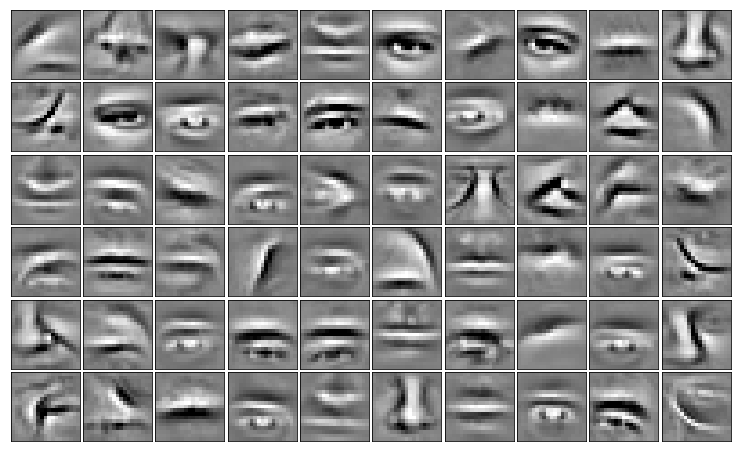

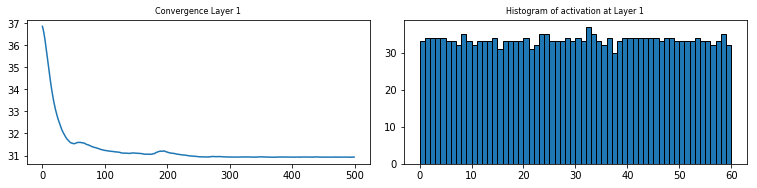

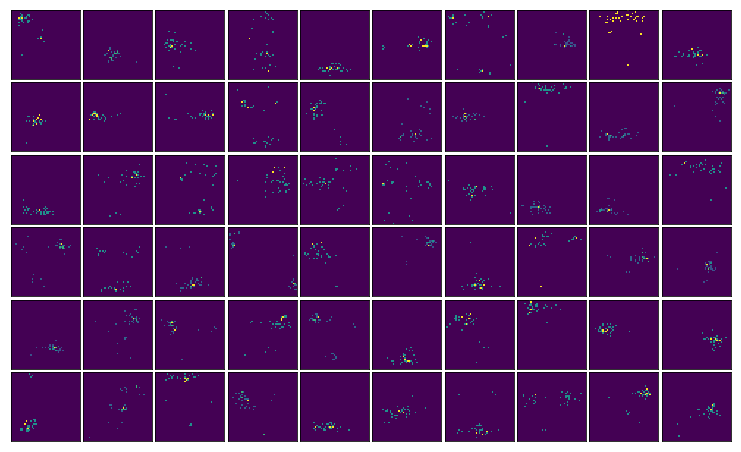

In [23]:
fname = 'cache_dir/CHAMP_high_HAP.pkl'
try:
    L1_mask = LoadNetwork(loading_path=fname)
except:

    nb_dico = 60
    width = 19
    dico_size = (width, width)
    l0 = 5
    mask = GenerateMask(full_size=(nb_dico, 1, width, width), sigma=0.8, style='Gaussian')
    # Learning Parameters
    eta_homeo = 0.0025
    eta = .05
    nb_epoch = 500
    # learn
    L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico,
                          dico_size=dico_size, mask=mask, verbose=0)
    dico_mask = L1_mask.TrainLayer(
        Filtered_L_TrSet, eta=eta, eta_homeo=eta_homeo, nb_epoch=nb_epoch, seed=seed)
    SaveNetwork(Network=L1_mask, saving_path=fname)

DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error', 'histo'])
DisplayWhere(L1_mask.where)

### Training on MNIST database


# Computational details



## caching simulation data

A convenience script to run and cache most learning items in this notebooks:

In [ ]:
!ls -l {shl.cache_dir}/{tag}*
#!rm {shl.cache_dir}/{tag}*lock*
#!rm {shl.cache_dir}/{tag}*
#!ls -l {shl.cache_dir}/{tag}*

In [24]:
%%writefile model.py
#!/usr/bin/env python3
# -*- coding: utf-8 -*
from shl_scripts.shl_experiments import SHL, prun
# pre-loading data
datapath = '../../SparseHebbianLearning/database'
opts = dict(datapath=datapath, verbose=0)
shl = SHL(**opts)
data = shl.get_data(matname='data')

# running main simulations
tag = 'ICLR'
# Figure 1 & 3
N_cv = 10
homeo_methods = ['None', 'OLS', 'HEH', 'HAP', 'EMP']
seed = 42

# running in parallel on a multi-core machine
import sys
try:
    n_jobs = sys.argv[2]
except:
    n_jobs = 1
    n_jobs = 4
    n_jobs = 9
    n_jobs = 10
    n_jobs = 35

list_figures = []

from shl_scripts.shl_experiments import SHL_set
for homeo_method in homeo_methods:
    experiments = SHL_set(dict(homeo_method=homeo_method, datapath=datapath), tag=tag + '_' + homeo_method, N_scan=N_cv)
    experiments.run(variables=['seed'], n_jobs=n_jobs, verbose=0)

# Figure 2-B
variables = ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']

variables = ['eta', 'alpha_homeo', 'eta_homeo']

for homeo_method in homeo_methods:
    experiments = SHL_set(dict(homeo_method=homeo_method, datapath=datapath), tag=tag + '_' + homeo_method)
    experiments.run(variables=variables, n_jobs=n_jobs, verbose=0)

# Annex X.X
for algorithm in ['lasso_lars', 'lasso_cd', 'lars', 'omp', 'mp']: # 'threshold',
    opts = dict(homeo_method='None', learning_algorithm=algorithm, verbose=0)
    shl = SHL(opts)
    dico= shl.learn_dico(data=data, list_figures=[],
                   matname=tag + ' - algorithm={}'.format(algorithm))

Overwriting model.py


In [ ]:
%run model.py

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts

##  version control

In [ ]:
!git status

In [ ]:
!git pull

In [ ]:
!git commit -am' ICLR : re-running notebooks' 

In [ ]:
!git push

##  exporting the notebook

In [ ]:
!jupyter nbconvert Annex.ipynb

In [ ]:
#!jupyter-nbconvert --template report --to pdf Annex.ipynb

In [ ]:
!pandoc Annex.html -o Annex.pdf

In [ ]:
!zip Annex.zip Annex.html

Done. Thanks for your attention!